<a href="https://colab.research.google.com/github/Rohan30/Rohan30/blob/main/ROSSMANNStoreSalesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name - Retail Sales Prediction**

**Project Type** - **Regression**

**Contribution** - **Individual**

#**Problem Statement**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

##**Business context**

You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

#***Let's Begin !***

##***1. Know Your Data***

###Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#using BaseN encoding
!pip install category_encoders
import category_encoders as ce

#importing VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
#ML
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Importing ResidualsPlot visualizer
from yellowbrick.regressor import ResidualsPlot
#Prediction Error Plot
from yellowbrick.regressor import PredictionError

#SHAP
!pip install shap
from sklearn.tree import export_graphviz
import shap 
import graphviz





Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 4.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 14.9 MB/s eta 0:00:00


###Dataset Loading

In [ ]:
#mount the dataset to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load Datasets
df1=pd.read_csv('/content/drive/MyDrive/Copy of Rossmann Stores Data.csv',engine='python')
df2=pd.read_csv('/content/drive/MyDrive/Copy of store.csv')

###Dataset First View

In [ ]:
#first dataset
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
#second dataset
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


###Dataset Rows & Columns count

In [ ]:
# First Dataset Rows & Columns 
df1.shape

(1017209, 9)

In [ ]:
# Second Dataset Rows & Columns 
df2.shape

(1115, 10)

###Dataset Information

In [ ]:
# First Dataset Info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
# Second Dataset Info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


Duplicate Values

In [ ]:
# First Dataset Duplicate Value Count
len(df1[df1.duplicated()])

0

In [ ]:
# Second Dataset Duplicate Value Count
len(df2[df2.duplicated()])

0

No Duplicate Values were found in any of the datasets.

Missing Values/Null Values

In [ ]:
#Missing Values for the first dataset
df1.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

There are no null values for the first dataset.

In [ ]:
#Missing Values for the second dataset
df2.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
#proportion of null values
df2.isnull().sum()/len(df2)

Store                        0.000000
StoreType                    0.000000
Assortment                   0.000000
CompetitionDistance          0.002691
CompetitionOpenSinceMonth    0.317489
CompetitionOpenSinceYear     0.317489
Promo2                       0.000000
Promo2SinceWeek              0.487892
Promo2SinceYear              0.487892
PromoInterval                0.487892
dtype: float64

There are a lot of missing values for the second dataset. The columns Promo2SinceWeek, Promo2SinceYear, PromoInterval have the most number of null values

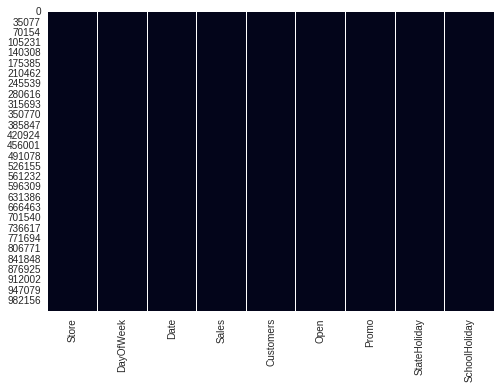

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df1.isnull(), cbar=False)

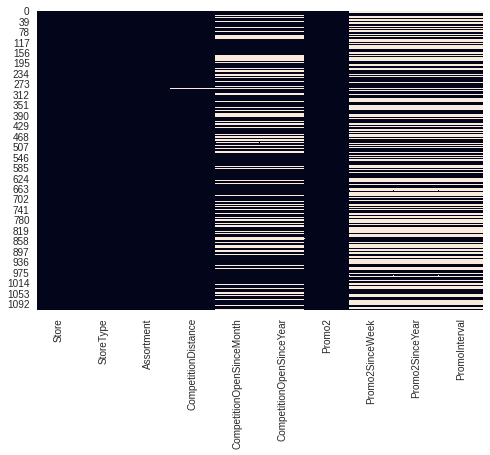

In [ ]:
sns.heatmap(df2.isnull(), cbar=False)

###What did you know about your dataset?



The datasets given are about the Retail Sales data for a chain of Rossmann stores, and we have to predict the sales made in a day.

The first dataset comprises of sales specific data and the no of holidays,promotions offered etc for each store whereas the second dataset comprises of store specific data on a deeper scale as to the types of assortments offered, competition related information, store type etc.

The first dataset has 1017209 rows and 9 columns. There are no mising values and duplicate values in the first dataset.

The second dataset has 1115 rows and 10 columns. There are no duplicate values but there are a lot of missing values in the dataset.

##***2. Understanding Your Variables***

In [ ]:
# First Dataset Columns
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
# Second Dataset Columns
df2.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# Dataset Describe
df1.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,986159,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [ ]:
df2.describe(include='all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


###Variables Description

Variables Involved in the first dataset:

**Store** - a unique Id for each store- Numeric Discete

**DayOfWeek** - a numerical respresentation for day of the week(eg:Monday-1, Tuesday-2 and so on)- Numeric Discrete

**Date** - date on which sales were made for stores in (YYYY-MM-DD format)- Initially given in string format, is later converted to datetime format

**Sales** - the turnover for any given day (this is what you are predicting)- Numeric Continuous

**Customers** - the number of customers on a given day- Numeric Discrete

**Open** - an indicator for whether the store was open: 0 = closed, 1 = open- Numerical Dummy

**Promo**- indicates whethera store is running a promo that day.- Numeric Dummy


**StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None - Categorical Nominal

**SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools. 0- no holiday, 1- holiday - Numeric Dummy

Variables Involved in the second dataset:

**Store** - a unique Id for each store- Numeric Discrete

**StoreType** - differentiates between 4 different store models: a, b, c, d- Categorical Nominal

**Assortment** - describes an assortment level: a = basic, b = extra, c = extended- Categorical Ordinal

**CompetitionDistance** - distance in meters to the nearest competitor store- Numeric Continuous

**CompetitionOpenSinceMonth** - gives the approximate month of the time the nearest competitor was opened- Numeric Discrete

**CompetitionOpenSinceYear** - gives the approximate year of the time the nearest competitor was opened- Numeric Discrete

**Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating- Numeric Dummy

**Promo2SinceWeek** - describes the calendar week when the store started participating in Promo2- Numeric Discrete

**Promo2SinceYear** - describes the year when the store started participating in Promo2- Numeric Discrete

**PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store- Categorical Nominal

###Check Unique Values for each variable.


In [ ]:
# Check Unique Values for each variable.
for i in df1.columns.tolist():
  print("No. of unique values in ",i,"is",df1[i].nunique(),".")

No. of unique values in  Store is 1115 .
No. of unique values in  DayOfWeek is 7 .
No. of unique values in  Date is 942 .
No. of unique values in  Sales is 21734 .
No. of unique values in  Customers is 4086 .
No. of unique values in  Open is 2 .
No. of unique values in  Promo is 2 .
No. of unique values in  StateHoliday is 4 .
No. of unique values in  SchoolHoliday is 2 .


In [ ]:
# Check Unique Values for each variable.
for i in df2.columns.tolist():
  print("No. of unique values in ",i,"is",df2[i].nunique(),".")

No. of unique values in  Store is 1115 .
No. of unique values in  StoreType is 4 .
No. of unique values in  Assortment is 3 .
No. of unique values in  CompetitionDistance is 654 .
No. of unique values in  CompetitionOpenSinceMonth is 12 .
No. of unique values in  CompetitionOpenSinceYear is 23 .
No. of unique values in  Promo2 is 2 .
No. of unique values in  Promo2SinceWeek is 24 .
No. of unique values in  Promo2SinceYear is 7 .
No. of unique values in  PromoInterval is 3 .


##***3. Data Wrangling***

###Data Wrangling Code

Next we will merge both tables into one so we can more easily work with them. We will join the tables based on the shared Store column, which is a foreign key in the store table and a primary key in the stores_data table, so we'll validate the merge based on this many-to-one relationship.

In [ ]:
## merging both the tables
df3 = pd.merge(df1, df2 , how='left', on="Store")

In [ ]:
df3.shape

(1017209, 18)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [ ]:
#creating 2 additional features to check instances of sales made and customers entered on a day to day basis.
df3['if_customer_came']=(np.where(df3['Customers']!=0,True,False))
#True stands for If customer came and False if customer didn't come
df3['if_sales_made']=(np.where(df3['Sales']!=0,True,False))
#True if sales were made  and False if sales weren't made

It was given that many stores were closed for refurbishment. So we won't be needing those entries.

In [ ]:
#checking the number of observations with zero sales
len(df3.loc[df3['Sales']==0])

172871

In [ ]:
#removing observations were sales were zero.
df3=df3[df3['Sales']!=0]

In [ ]:
df3.shape

(844338, 20)

In [ ]:
df3['StateHoliday'].value_counts()

0    843428
a       694
b       145
c        71
Name: StateHoliday, dtype: int64

In [ ]:
df3['SchoolHoliday'].value_counts()

0    680893
1    163445
Name: SchoolHoliday, dtype: int64

In [ ]:
df3['Open'].value_counts()

1    844338
Name: Open, dtype: int64

In [ ]:
df3['Promo'].value_counts()

0    467463
1    376875
Name: Promo, dtype: int64

In [ ]:
print(df3.groupby('StateHoliday')['Open'].value_counts())

StateHoliday  Open
0             1       843428
a             1          694
b             1          145
c             1           71
Name: Open, dtype: int64


In [ ]:
print(df3.groupby('StateHoliday')['Promo'].value_counts())

StateHoliday  Promo
0             0        466989
              1        376439
a             1           386
              0           308
b             0            95
              1            50
c             0            71
Name: Promo, dtype: int64


In [ ]:
print(df3.groupby('StateHoliday')['if_customer_came'].value_counts())

StateHoliday  if_customer_came
0             True                843428
a             True                   694
b             True                   145
c             True                    71
Name: if_customer_came, dtype: int64


In [ ]:
print(df3.groupby('StateHoliday')['if_sales_made'].value_counts())

StateHoliday  if_sales_made
0             True             843428
a             True                694
b             True                145
c             True                 71
Name: if_sales_made, dtype: int64


In [ ]:
print(df3.groupby('SchoolHoliday')['Open'].value_counts())

SchoolHoliday  Open
0              1       680893
1              1       163445
Name: Open, dtype: int64


In [ ]:
print(df3.groupby('SchoolHoliday')['Promo'].value_counts())

SchoolHoliday  Promo
0              0        381777
               1        299116
1              0         85686
               1         77759
Name: Promo, dtype: int64


In [ ]:
print(df3.groupby('SchoolHoliday')['if_customer_came'].value_counts())

SchoolHoliday  if_customer_came
0              True                680893
1              True                163445
Name: if_customer_came, dtype: int64


In [ ]:
print(df3.groupby('SchoolHoliday')['if_sales_made'].value_counts())

SchoolHoliday  if_sales_made
0              True             680893
1              True             163445
Name: if_sales_made, dtype: int64


In [ ]:
print(df3.groupby('if_sales_made')['Promo'].value_counts())

if_sales_made  Promo
True           0        467463
               1        376875
Name: Promo, dtype: int64


In [ ]:
print(df3.groupby('Promo')['Sales'].mean())

Promo
0    5929.826183
1    8228.739731
Name: Sales, dtype: float64


In [ ]:
print(df3.groupby('if_sales_made')['if_customer_came'].value_counts())

if_sales_made  if_customer_came
True           True                844338
Name: if_customer_came, dtype: int64


In [ ]:
print(df3.groupby('if_sales_made')['Promo2'].value_counts())

if_sales_made  Promo2
True           0         423292
               1         421046
Name: Promo2, dtype: int64


In [ ]:
print(df3.groupby('if_sales_made')['DayOfWeek'].value_counts())

if_sales_made  DayOfWeek
True           6            144052
               2            143955
               3            141922
               5            138633
               1            137557
               4            134626
               7              3593
Name: DayOfWeek, dtype: int64


In [ ]:
print(df3.groupby('if_sales_made')['StoreType'].value_counts())

if_sales_made  StoreType
True           a            457042
               d            258768
               c            112968
               b             15560
Name: StoreType, dtype: int64


In [ ]:
print(df3.groupby('StoreType')['Sales'].mean())

StoreType
a     6925.697986
b    10233.380141
c     6933.126425
d     6822.300064
Name: Sales, dtype: float64


In [ ]:
print(df3.groupby('if_sales_made')['Assortment'].value_counts())

if_sales_made  Assortment
True           a             444875
               c             391254
               b               8209
Name: Assortment, dtype: int64


In [ ]:
print(df3.groupby('Assortment')['Sales'].mean())

Assortment
a    6621.523057
b    8642.503594
c    7300.843547
Name: Sales, dtype: float64


In [ ]:
df3['DayOfWeek'].value_counts()

6    144052
2    143955
3    141922
5    138633
1    137557
4    134626
7      3593
Name: DayOfWeek, dtype: int64

In [ ]:
print(df3.groupby('DayOfWeek')['Sales'].mean())

DayOfWeek
1    8216.252259
2    7088.409086
3    6728.786679
4    6768.214973
5    7073.034133
6    5875.084935
7    8224.723908
Name: Sales, dtype: float64


###What all manipulations have you done and insights you found?


Created 2 new features in the merged dataset about the number of instances sales were made and customers came.

Following were the initial insights obtained:

1)The number of days where there were no state holidays were the maximum and the number of days when the state holiday was Christmas was the minimum.

2)More days when there was no school holiday compared to days when there was a school holiday.

3)Stores were open on all the instances.

4)Promotions were not offered on more instances compared to instances on which they were offered.

5)Most number of stores were open when there was no state holiday. Least number of stores were open when the state holiday was Christmas.

6)Among state holidays,no promotions were made when it was Christmas, Most promotions offered when there were public holidays. One possible reason could be that the stores knew that there would be more inflow when there were other state holidays and offering promotions when there were no state holidays would bring in more revenue. 
But most promotions were offered when there were no State Holidays.

7) Maximum instances of sales when there was no state holiday and minimum instances of sales when the state holiday was Christmas.

8)Least number of customers came and sales were made when the state holiday was Christmas.This could be due to the fact that no promotions were offered on Christmas.

9)Even though lesser number of promotions were offered when there was a School Holiday compared to no school holidays, relatively more promotions were offered for the above scenario.

10)Lesser number of customers came and sales were made when there was a school holiday compare to when there was no school holiday.

11)Most Sales were made when assortment was type a and least when type b.

12) Average Sales were more when assortment was type b and least when type a.

13)Most sales were made when store type was a and least when type b.

14) Average sales were more when store was type b and least when type d.

15) More sales occured when there were no continued promotions.

16)Sales made and customers who came to the store seem to be highly correlated.

17) More average sales were made when promotions were offered compared to no promotions.

18)The least number of days and sales were on Sunday and most on Saturday, but the average sales were maximum on Sunday and least on Saturday.

Some of the above observations could be confirmed using various visualisations. But deeper insights could be obtained through aggregation, variable creation techniques.

##***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
#Dropping the columns if_sales_made,  if_customer_came
df3.drop(columns=['if_sales_made','if_customer_came'],axis=1,inplace=True)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844338 non-null  int64  
 1   DayOfWeek                  844338 non-null  int64  
 2   Date                       844338 non-null  object 
 3   Sales                      844338 non-null  int64  
 4   Customers                  844338 non-null  int64  
 5   Open                       844338 non-null  int64  
 6   Promo                      844338 non-null  int64  
 7   StateHoliday               844338 non-null  object 
 8   SchoolHoliday              844338 non-null  int64  
 9   StoreType                  844338 non-null  object 
 10  Assortment                 844338 non-null  object 
 11  CompetitionDistance        842152 non-null  float64
 12  CompetitionOpenSinceMonth  575738 non-null  float64
 13  CompetitionOpenSinceYear   5

In [ ]:
#creating a categorical column list
'''categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']'''

#numeric_variables=['Sales','Customers','CompetitionDistance']
#bool=['if_sales_made','if_customers_came']
#date- 'Date'
     

####Plot 1- Categorical Plot of Sales with respect to Promotions(Bi-Variate Analysis- Categorical and Numerical)

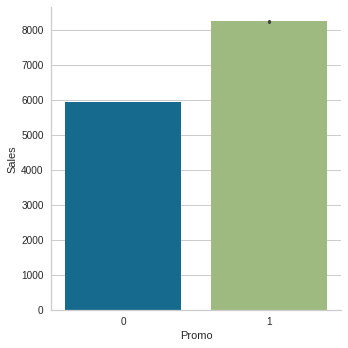

In [ ]:
sns.catplot(data=df3, x='Promo', y="Sales",kind='bar')

#####1. Why did you pick the specific chart?

A categorical plot is the best way of representing data when there is a categorical variable and a numeric variable. There is a kind parameter where you can specify the type of plot to be produced. By default, the mean values of each category is plotted.

#####2. What is/are the insight(s) found from the chart?

From the above plot, the mean sales were more when promotions were offered.

#####3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



Even going by intuition, customers are more likely to make purchases when promotions are made compared to no promotions offered. Although a company can't rely on offering promotions every now and then expecting more sales since it would lead to lesser profits in the long run.

####Plot 2- Count Plot of Promotions(Univariate Analysis)

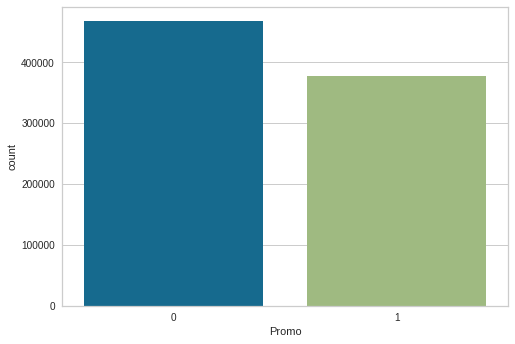

In [ ]:
sns.countplot(data=df3, x='Promo')

#####1. Why did you pick the specific chart?-

 

A countplot is a simple representation of categorical variables. Here Despite having higheraverage sales when promotions were offered, one needs to know what caused the average value to rise. Is it due to higher Sales Revenue or lower instances of occurences?

#####2. What is/are the insight(s) found from the chart?- 



From the above plot, it can be concluded that the instances of sales made when promotions were offered were lesser compared to when promotions weren't offered.

#####3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason



From the plot, it is profitable for a business whenever the instances of promotions offered are lesser but greater revenue can be generated during this phase. (Higher Numerator and Lower Denominator driving Average value)

####Plot 3- Barplot of Sales and Open(Bivariate Analysis-Categorical and Numerical)

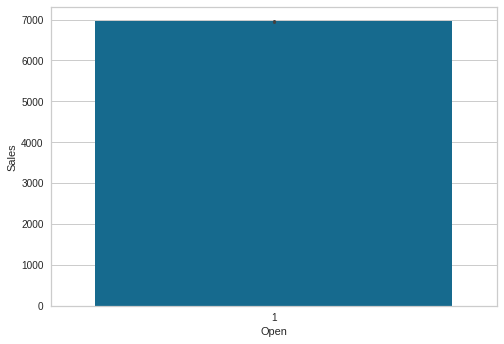

In [ ]:
sns.barplot(data=df3, x='Open', y="Sales")

#####1.Why did you pick the specific chart?



A barplot is a simple representation of categorical variables with a numeric variable.

#####2. What is/are the insight(s) found from the chart?



From the above plot, it can be observed that sales were made only when the store was open

#####3.Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason



Keeping Stores Open and Not Closed will only lead to Sales, unless the Company has an online presence where it can afford to keep it physical stores closed and sell products online.

####Plot 4- Lineplot of Sales and DayOfWeek(Bivariate Analysis-Categorical with Numerical)

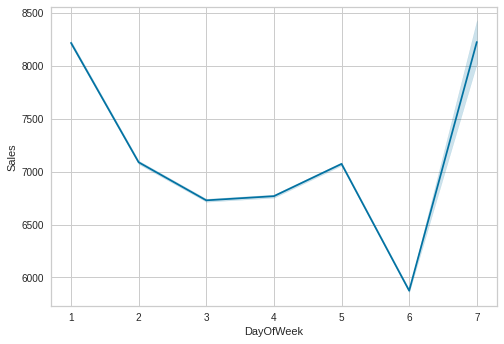

In [ ]:
sns.lineplot(data=df3, x='DayOfWeek', y="Sales")

#####1.Why did you pick the specific chart?





This is a line plot, Here we will obtain on which day the average sales were highest and how drastically sales changes over the other days.

#####2. What are the insights found from the chart?



Here , We found that the highest average sales occured on Sunday that is on the last day of the week. This is because despite the low number of Sundays in the given data, the number of purchases made on Sunday were the highest. This is due to more high value purchases made on Sunday.

#####3.Will the gained insights help creating a positive business impact?Are there any insights that lead to negative growth? Justify with specific reason.



The average sales was highest on Sunday, which is good for the store as it can attract more customers. The next value falls on Monday and then it decreases then increases and so on. So,the store could offer promotions on weekdays,to increase the average value of sales on weekdays. Also the sales on Saturday could be bumped through offers valid only on Saturdays.

####Plot 5- Categorical Plot of Sales and DayOfWeek with Promo(when Promotions are offered)(Multivariate Analysis-Categorical and Numerical with Categorical)

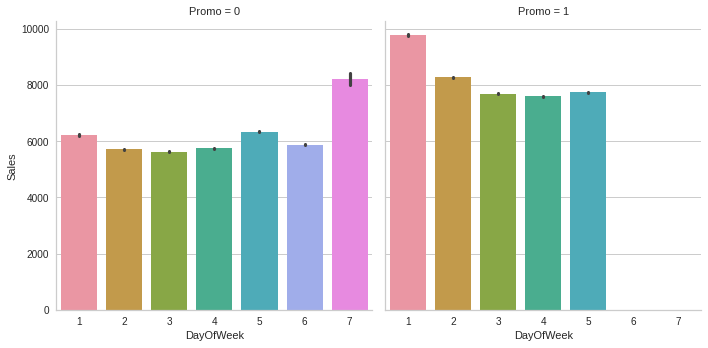

In [ ]:
sns.catplot(data=df3, x='DayOfWeek', y="Sales",kind='bar',col='Promo')

#####1. Why did you pick the specific chart?



A categorical plot is a simple way of representing data when there is a categorical variable and a numeric variable. Here a MultiVariate Analysis is also performed. So it can be easier to understand compared to Line plots that can potentially confuse the viewer.

#####2. What are the insights found from the chart?



Here the average sales were higher when promotions were offered compared to when no promotions were offered. Also on weekends the sales was zero when promotions were offered. This trend could be due to the fact that no promotions were offered on the weekends.



#####3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.



It is evident that average sales were higher when promotions were offered on weekdays. But the company needs to devise ways to attract customers without promotions too. While it is beneficial for the company in the short run, it would create problems in the long run.

####Plot 6- Categorical Plot of Sales against DayOfWeek with StateHoiday- when state holidays are considered. (Multivariate Analysis- Categorical and Numerical with Categorical)

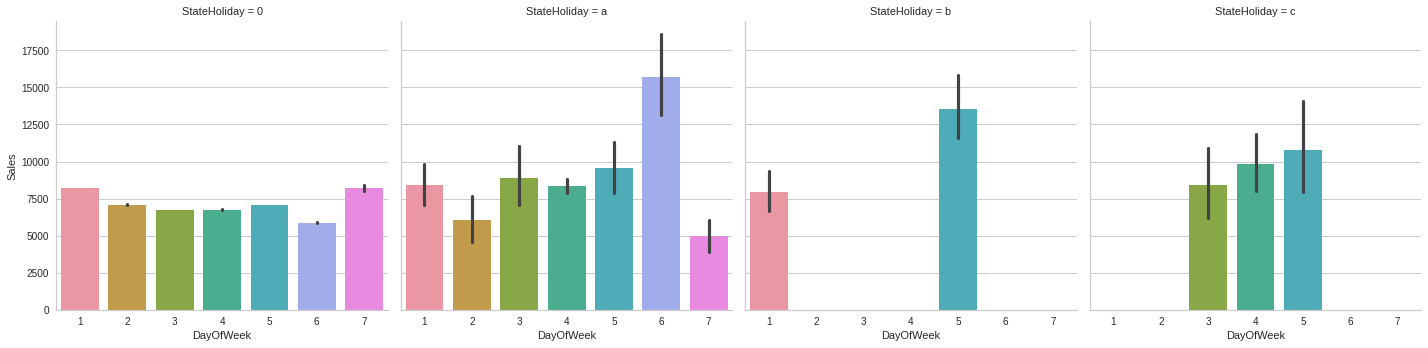

In [ ]:
sns.catplot(data=df3, x='DayOfWeek', y="Sales",kind='bar',col='StateHoliday')

#####1. Why did you pick the specific chart?




A categorical plot is a simple way of representing data when there is a categorical variable and a numeric variable. Here a MultiVariate Analysis is also performed. So it can be easier to understand compared to Line plots that can potentially confuse the viewer.


#####2. What are the insights found from the chart?



The average sales were higher when the state holiday was a public holiday(a) compared to when there were no state holidays or when the holidays were Easter(b) and Christmas(c). This is due to lower number of days where state holiday was a public holiday compared to days when no there was no state holiday. The same could be said for sales only on particular days of the week for Easter and Christmas.



#####3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.



The presence of Sales only on specific days of the week when state holidays are considered could be noted by stores. Strategies could be formulated to increase sales on Easter and Christmas.

####Plot 7- Categorical Plot of Sales against DayOfWeek with SchoolHoliday- when school holidays are considered. (Multivariate Analysis-Categorical and Numerical with Categorical)



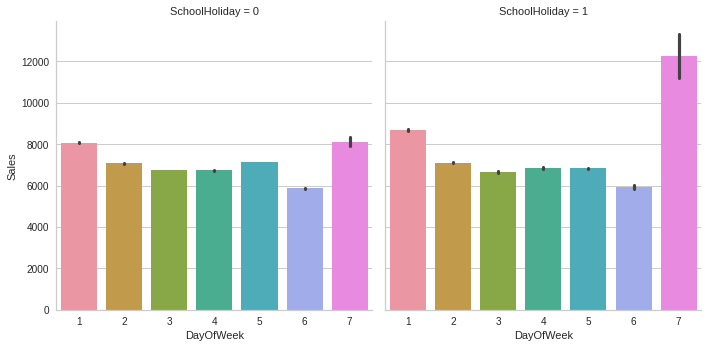

In [ ]:
sns.catplot(data=df3, x='DayOfWeek', y="Sales",kind='bar',col='SchoolHoliday')

#####1. Why did you pick the specific chart?



A categorical plot is a simple way of representing data when there is a categorical variable and a numeric variable. Here a Multivariate Analysis is also performed. So it can be easier to understand compared to Line plots that can potentially confuse the viewer.

#####2. What are the insights found from the chart?





The average sales more or less show a similar value irrespective of school holiday except on a Sunday. This is somewhat good for a store considering the fact that the no of school holidays is lesser than the no of school holidays.

More Sales on Sunday could be due to the fact that schools don't function definitely on Sundays and thereby ensuring more purchases since customers are free on a Sunday compared to other days for shopping.

#####3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason



If this trend continues, it is good as far as a store is considered since it can maintain a similar average across the number of days irrespective of school holidays.

####Plot 8- Count Plot of  StoreType. (Univariate Analysis)



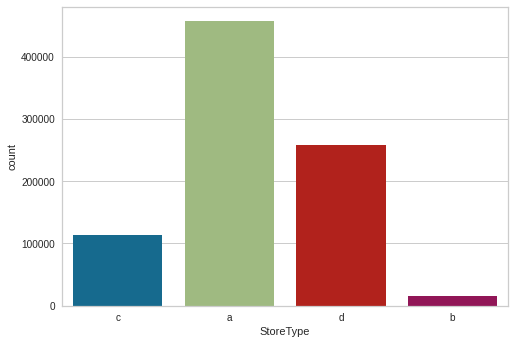

In [ ]:
sns.countplot(df3['StoreType'])

#####1. Why did you pick the specific chart?



A countplot is a simple way of representing data when there is a categorical variable or when a univariate analysis is needed.

#####2. What are the insights found from the chart?



The maximum number of stores are of store type 'a'. The minimum number of stores are of type 'b'

#####3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason



Since the number of stores of type a are the maximum and of type b is minimum, the company can devise store specific offers and strategies to drive sales accordingly.

####Plot 9- Count Plot of Assortment Type. (Univariate Analysis)



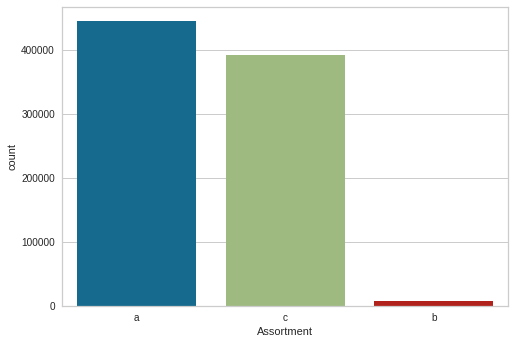

In [ ]:
sns.countplot(df3['Assortment'])

#####1. Why did you pick the specific chart?



A countplot is a simple way of representing data when there is a categorical variable or when a univariate analysis is needed.

#####2. What are the insights found from the chart?



The maximum number of assortments are type 'a'. The minimum number is of type 'b'

#####3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason



Since the number of assortments of type a are the maximum and of type b is minimum, the company can devise store specific offers and strategies to drive sales accordingly.

####Plot 10- Categorical Plot of Sales with StoreType and Assortment. (Multivariate Analysis- Categorical and Numerical with Categorical)



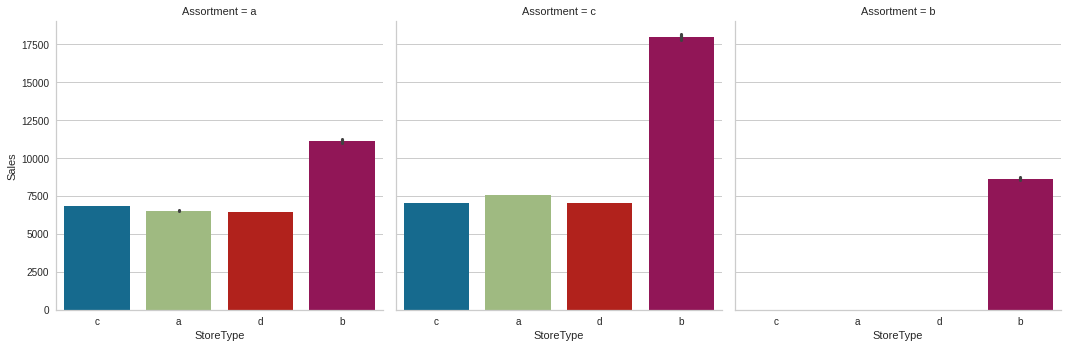

In [ ]:
sns.catplot(data=df3,x='StoreType',y='Sales',col='Assortment',kind='bar')

#####1. Why did you pick the specific chart?



A categorical plot is a simple way of representing data when there is a categorical variable and a numeric variable. Here a MultiVariate Analysis is also performed. So it can be easier to understand compared to Line plots that can potentially confuse the viewer.

#####2. What are the insights found from the chart?



From the previous plots, we saw that lower number of sales were for store type 'b' and assortment for type 'b'. But Despite, the low instances of sales, the average sales for different assortment types were highest for store 'b'. Also when it comes to assortments type 'b' only store type 'b' offered them.

#####3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason



As far as the company is concerned, store type 'b', performed very well despite less instances of sales. The company could devise strategies to drive sales of assortment type 'b' in other stores as well.

####Plot 11- Barplot of Sales and StoreType with Promo2 - when continued promotions are offered.(Multivariate Analysis- Categorical and Numerical with Categorical)

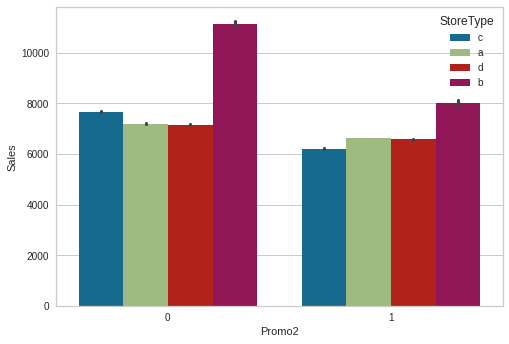

In [ ]:
sns.barplot(data=df3,x='Promo2',y='Sales',hue='StoreType')

#####1. Why did you pick the specific chart?




A categorical plot is a simple way of representing data when there is a categorical variable and a numeric variable. Here a MultiVariate Analysis is also performed. So it can be easier to understand compared to Line plots that can potentially confuse the viewer.


#####2. What are the insights found from the chart?



More Sales were made when continued promotions weren't offered compared to when continued promotions were offered.

#####3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason



When continued promotions were offered, the instances of sales weren't increasing. This is due to lesser instances of days when continued promotions were offered or lack of product value in the minds of the customers due to conntinued promotions.

#####Plots concerning Numeric Variables

####Plot 12- ScatterPlot of Sales and Customers (Bivariate Analysis)

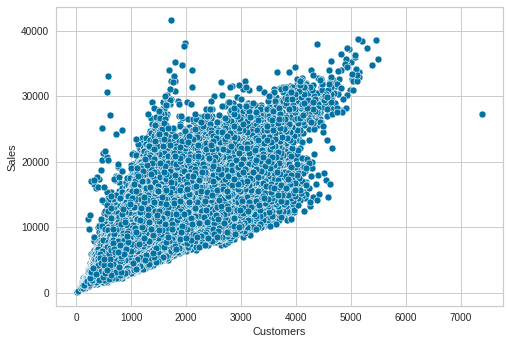

In [ ]:
sns.scatterplot(data=df3,x='Customers',y='Sales')

#####1. Why did you pick the specific chart?



A ScatterPlot is a simple way of performing a bivariate analysis between numeric variables. It is also capable of showing outliers, the nature of correlation.

#####2. What are the insights found from the chart?





Here from the above plot, more sales were made when the customers were high and vice versa. Since the data points are closely packed to each other, it is an indication that customers and sales are strongly correlated.

#####3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason



As far as a business is concerned, more sales value is generally driven by larger customer footfall. So increasing customer footfall through various offerings, promotions could be key to drive sales as they say 'Customer is King'

####Plot 13- Relative plot of Sales and CompetitionOpenSinceYear For Different StoreType (Multivariate Analysis- Numerical and Numerical with Categorical )

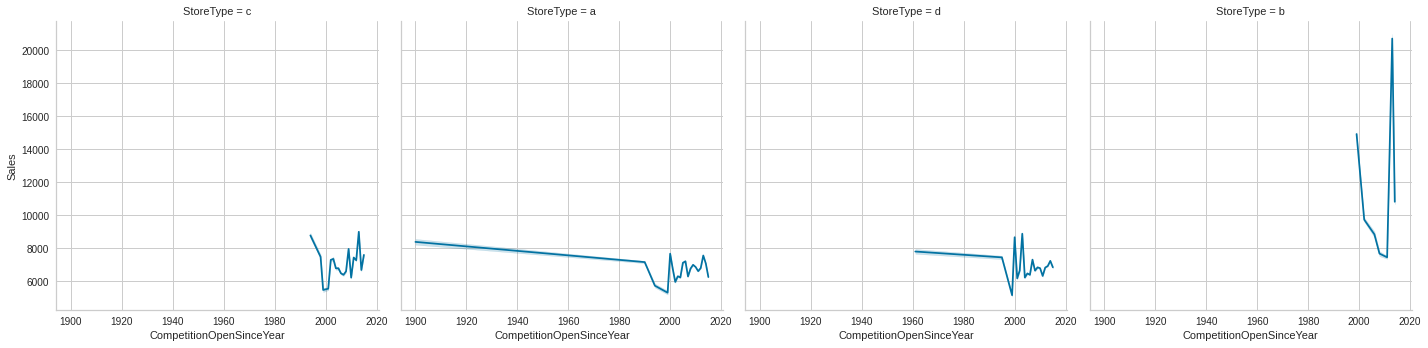

In [ ]:
sns.relplot(
    data=df3, x="CompetitionOpenSinceYear", y="Sales",
    col="StoreType",
    kind="line"
)

#####1. Why did you pick the specific chart?



A relplot is a simple way of understanding a multivariate relationship among numeric variables. Here, subsets of store type are generated as different plots instead of cluttering the original plot of Sales and CompetitionOpenSinceYear. Also, the plot can depict trends and changes.

#####2. What are the insights found from the chart?



Sales were higher for StoreType 'a' when competition wasn't strong(early 1900s- 1940s),then a downward trend is seen,followed by irregularity. An irregular could be observed for StoreType 'c' and 'd'.
StoreType 'b' despite being relatively newer compared to other StoreTypes is performing much better with Competition.

#####3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason



Even though StoreType 'b' has a better performance, it is observed that with more number of stores being opened that pose as competition, the sales
doesn't improve much.

Stores can better study their competitors and make unique offerings, have an exclusive partnership with Drug Houses for housing better quality products

####Plot 14- Relative plot of Sales and CompetitionDistance For Different StoreType (Multivariate Analysis- Numerical and Numerical with Categorical)

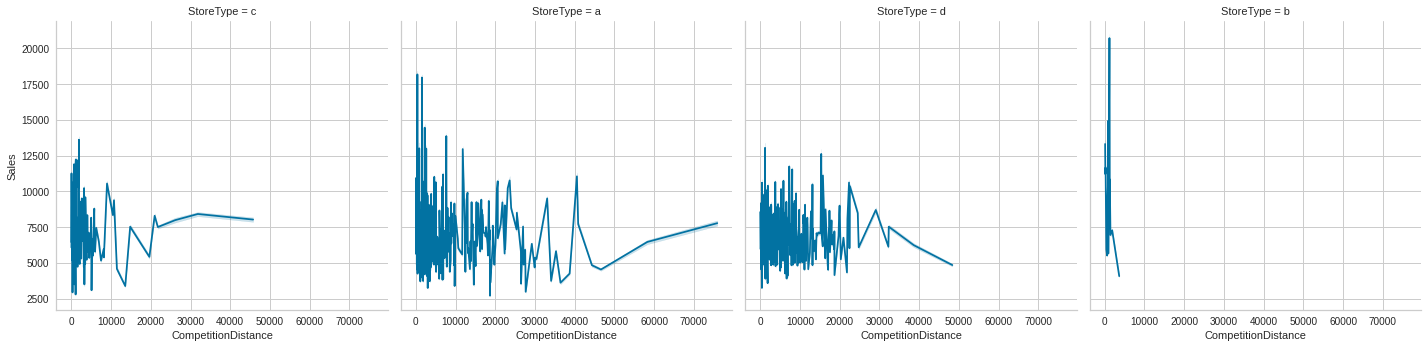

In [ ]:
sns.relplot(
    data=df3, x="CompetitionDistance", y="Sales",
    col="StoreType",
    kind="line"
)

#####1. Why did you pick the specific chart?



A relplot is a simple way of understanding a multivariate relationship among numeric variables. Here, subsets of store type are generated as different plots instead of cluttering the original plot of Sales and CompetitionOpenSinceYear. Also, the plot can depict trends and changes.

#####2. What are the insights found from the chart?



Sales were higher for StoreType 'b' with lesser competition distance.
Store types 'b' and 'd' exhibit declining sales with increasing competition distance compared to Store types 'a' and 'c' that perform relatively better with increasing competition distance.

#####3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason



Generally Stores perform better as competition distance increases, however, store types 'b' and 'd' exhibit a different trend. This could be due to factors such as

Reduced product differentiation: With fewer competitors in the market, there may be less product differentiation, which can result in reduced consumer interest and lower sales. 

Reduced competition pressure: With fewer competitors, there is less pressure on companies to compete on price, quality, and other factors. This can lead to a lack of innovation and a decrease in product quality, which can result in reduced sales over time.

####Plot 15- Distribution Of Assortment within StoreType(Bivariate Analysis- Categorical and Categorical)

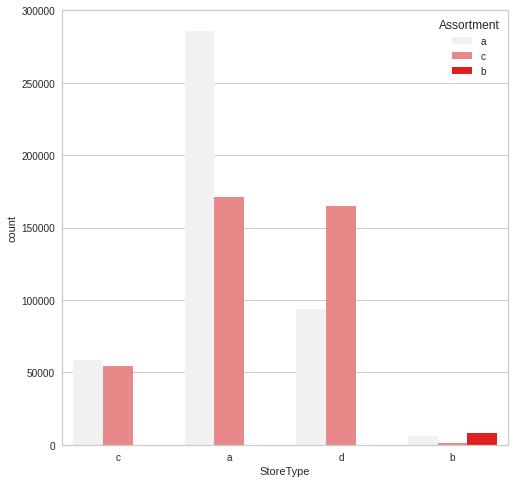

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(data=df3,x="StoreType",hue='Assortment',color='red')

#####1. Why did you pick the specific chart?



A countplot is a simple plot to understand the bivariate relationship between categorical variables.

#####2. What are the insights found from the chart?



Assortment Type 'b' isn't found in any StoreType except for 'b'. This could be that Assortment 'b' is an exclusive product for StoreType 'b'

#####3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason



Store Specific Offerings need to be studied on a deeper level to generate useful insights. Assortment b could be introduced to other store types as well given more instances of sales in these stores compared to store type b.

##***5. Hypothesis Testing***

Here in this project, assumptions haven't been made about the population to be tested with a certain sample size, so hypothesis testing isn't done.

##***6. Feature Engineering & Data Pre-processing***

###1. Handling Missing Values

In [ ]:
#information of the dataset
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844338 non-null  int64  
 1   DayOfWeek                  844338 non-null  int64  
 2   Date                       844338 non-null  object 
 3   Sales                      844338 non-null  int64  
 4   Customers                  844338 non-null  int64  
 5   Open                       844338 non-null  int64  
 6   Promo                      844338 non-null  int64  
 7   StateHoliday               844338 non-null  object 
 8   SchoolHoliday              844338 non-null  int64  
 9   StoreType                  844338 non-null  object 
 10  Assortment                 844338 non-null  object 
 11  CompetitionDistance        842152 non-null  float64
 12  CompetitionOpenSinceMonth  575738 non-null  float64
 13  CompetitionOpenSinceYear   5

From the above description, columns CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear and PromoInterval have null values.



In [ ]:
df3['Promo2'].value_counts()

0    423292
1    421046
Name: Promo2, dtype: int64

In [ ]:
df3['Promo2SinceWeek'].isnull().sum()

423292

In [ ]:
df3['Promo2SinceYear'].isnull().sum()

423292

In [ ]:
df3['PromoInterval'].isnull().sum()

423292

Simple visualization Of columns Promo2SinceWeek,Promo2SinceYear andPromoInterval.

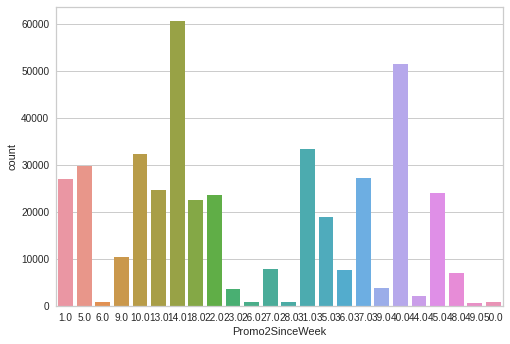

In [ ]:
sns.countplot(df3['Promo2SinceWeek'])

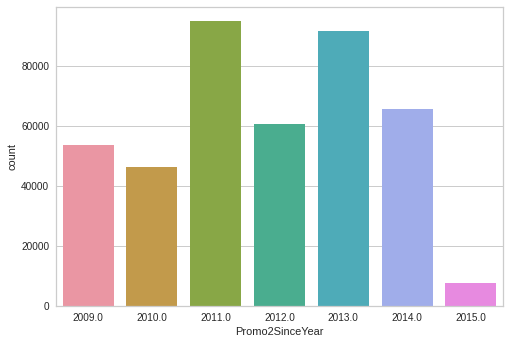

In [ ]:
sns.countplot(df3['Promo2SinceYear'])

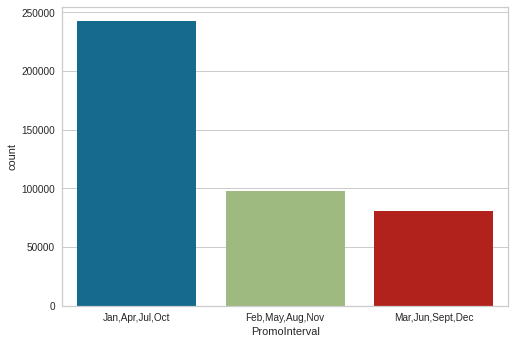

In [ ]:
sns.countplot(df3['PromoInterval'])

Here Promo2SinceWeek, PromoInterval, Promo2SinceYear have close to 50% null values and since the presence of null values in these columns is due to the 0 observation value in Promo2, we can drop the 3 columns. So just keeping Promo2 column would be better for the regression model that is to be modelled.

In [ ]:
df3.drop(columns=['PromoInterval','Promo2SinceYear','Promo2SinceWeek'],inplace=True)

In [ ]:
#checking null values
df3.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2186
CompetitionOpenSinceMonth    268600
CompetitionOpenSinceYear     268600
Promo2                            0
dtype: int64

Since CompetitionDistance has 2186 null values, they were replaced with 0. Assume that the competitor stores and the rossmann stores were adjacent to each other.

In [ ]:
df3['CompetitionDistance'].fillna(0,inplace=True)
df3['CompetitionDistance'].isnull().sum()

0

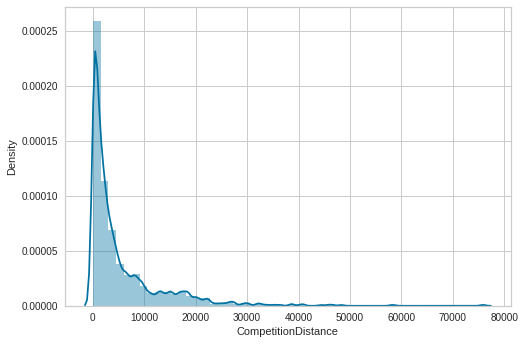

In [ ]:
#visualizing CompetitionDistance
sns.distplot(df3['CompetitionDistance'])

Treating Null Values For CompetitionOpenSinceMonth,  CompetitionOpenSinceYear

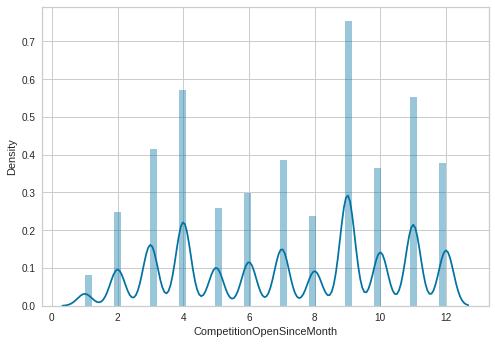

In [ ]:
#visualizing CompetitionOpenSinceMonth
sns.distplot(df3['CompetitionOpenSinceMonth'])

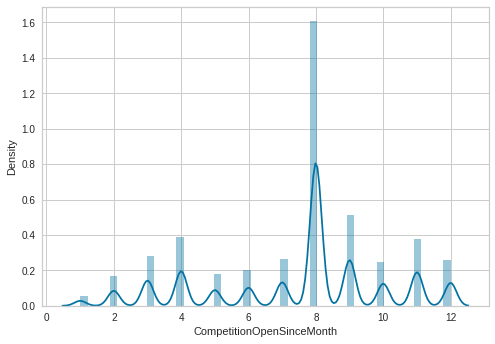

In [ ]:
#Treating Null Values with Median
df3['CompetitionOpenSinceMonth']=df3['CompetitionOpenSinceMonth'].fillna(df3['CompetitionOpenSinceMonth'].median())
sns.distplot(df3['CompetitionOpenSinceMonth'])


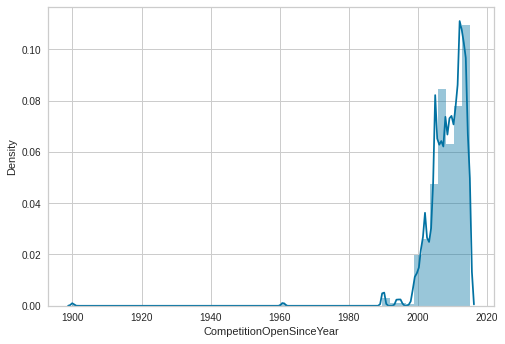

In [ ]:
#visualizing CompetitionOpenSinceYear
sns.distplot(df3['CompetitionOpenSinceYear'])

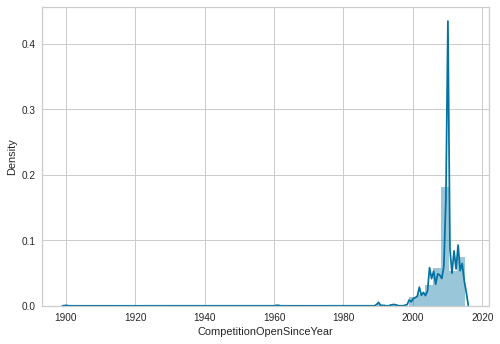

In [ ]:
#Treating Null Values with Median
df3['CompetitionOpenSinceYear']=df3['CompetitionOpenSinceYear'].fillna(df3['CompetitionOpenSinceYear'].median())
sns.distplot(df3['CompetitionOpenSinceYear'])

In [ ]:
#checking for null values
df3.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
dtype: int64

The null values have been treated.

####What all missing value imputation techniques have you used and why did you use those techniques?

First the **CompetitionDistance** null values can be filled with zero. Since, it could be assumed the competitiors are located just beside the some of the Rossmann stores.

Secondly the null values for **CompetitionOpenSinceMonth** and **CompetitionOpenSinceYear** have been imputed with the respective median values.

Imputing null values with the median is a common strategy in data preprocessing, especially when dealing with numerical data. The median is the middle value in a set of numbers, and it is less sensitive to extreme values than the mean. Therefore, it can be a more robust measure of central tendency to impute missing values.


###2. Handling Outliers

#####Sales Outlier Analysis

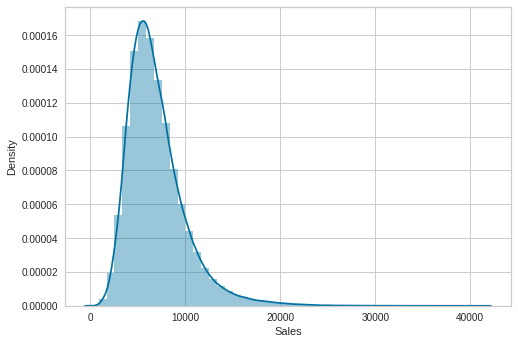

In [ ]:
#visualisation of sales column
sns.distplot(df3['Sales'])

The distribution is right skewed, so some transformation needs to be done.

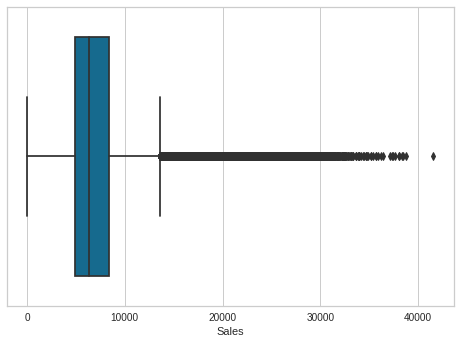

In [ ]:
#boxplot for outlier detection
sns.boxplot(df3['Sales'])

Here, there are a lot of outliers for Sales feature. So let's check the proportion of outliers using the interquartile range and determine the lower fence an outer fence boundary points.

Calculation of boundary points isn't done using mean+-3*std since the data isn't normal.

Checking the statistics of Sales feature using describe() method.

In [ ]:
df3['Sales'].describe()

count    844338.000000
mean       6955.959134
std        3103.815515
min          46.000000
25%        4859.000000
50%        6369.000000
75%        8360.000000
max       41551.000000
Name: Sales, dtype: float64

In [ ]:
iqr=df3['Sales'].quantile(0.75)-df3['Sales'].quantile(0.25)
#Lower fence boundary points
lower_bridge=df3['Sales'].quantile(0.25)-iqr*1.5
upper_bridge=df3['Sales'].quantile(0.75)+iqr*1.5
print(lower_bridge,upper_bridge)
#Outer fence boundary points
lower_extreme=df3['Sales'].quantile(0.25)-iqr*3
upper_extreme=df3['Sales'].quantile(0.75)+iqr*3
print(lower_extreme,upper_extreme)

-392.5 13611.5
-5644.0 18863.0


We take the outer fence boundary points since the maximum value of Sales is 41551 so considering it as a outlier with reference to 18863 would be better.

In [ ]:
#checking the proportion of outliers
len(df3.loc[df3['Sales']>18863])/len(df3['Sales'])

0.007103790188289524

Only 0.7% of the values are outliers. So we don't remove them, we will check if the outliers get reduced after data transformation and do a check again.

#####Customer Outlier Analysis

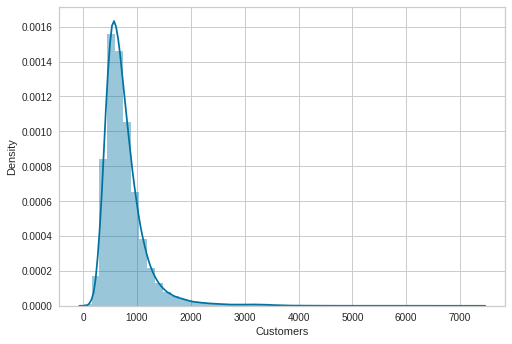

In [ ]:
#distribution plot
sns.distplot(df3['Customers'])

The distribution is right skewed, so some transformation needs to be done.

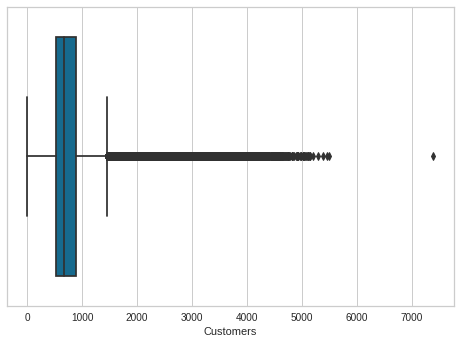

In [ ]:
#boxplot for outlier detection
sns.boxplot(df3['Customers'])

Here, there are a lot of outliers for Customers feature. So let's check the proportion of outliers using the interquartile range and determine the lower fence an upper fence boundary points.

Calculation of boundary points isn't done using mean+-3*std since the data isn't normal.

Checking the statistics of Customer Feature using describe() method.

In [ ]:
df3['Customers'].describe()

count    844338.000000
mean        762.777166
std         401.194153
min           8.000000
25%         519.000000
50%         676.000000
75%         893.000000
max        7388.000000
Name: Customers, dtype: float64

In [ ]:
iqr=df3['Customers'].quantile(0.75)-df3['Customers'].quantile(0.25)
#Lower Fence boundary points
lower_bridge=df3['Customers'].quantile(0.25)-iqr*1.5
upper_bridge=df3['Customers'].quantile(0.75)+iqr*1.5
print(lower_bridge,upper_bridge)
#Outer Fence boundary points
lower_extreme=df3['Customers'].quantile(0.25)-iqr*3
upper_extreme=df3['Customers'].quantile(0.75)+iqr*3
print(lower_extreme,upper_extreme)

-42.0 1454.0
-603.0 2015.0


We take the outer fence boundary points since the maximum value of Customers is 7388 so considering it as a outlier with reference to 2015 would be better.

In [ ]:
#checking the proportion of outliers
len(df3.loc[df3['Customers']>2015])/len(df3['Customers'])

0.017046490860295284

Only 1.7% of the values are outliers. So we don't remove them, we will check if the outliers get reduced after data transformation and do a check again.

#####Outlier Analysis

In [ ]:
df100=df3.loc[(df3['Customers']>2015)&(df3['Sales']>18863)]

In [ ]:
df100.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
250,251,5,2015-07-31,22205,2508,1,1,0,1,a,c,340.0,8.0,2010.0,0
261,262,5,2015-07-31,25774,3669,1,1,0,1,b,a,1180.0,5.0,2013.0,0
319,320,5,2015-07-31,19898,2316,1,1,0,1,a,c,210.0,9.0,2012.0,0
382,383,5,2015-07-31,22129,2297,1,1,0,1,a,c,350.0,8.0,2010.0,0
512,513,5,2015-07-31,19959,2177,1,1,0,1,a,a,400.0,8.0,2013.0,0


In [ ]:
df100.groupby('StoreType')['Sales'].mean()

StoreType
a    22168.049175
b    22211.216777
c    21511.885475
d    25897.000000
Name: Sales, dtype: float64

In [ ]:
df100.groupby('Assortment')['Sales'].mean()

Assortment
a    22558.694458
b    19851.875000
c    21802.718085
Name: Sales, dtype: float64

In [ ]:
df100.groupby('StateHoliday')['Sales'].mean()

StateHoliday
0    22085.978280
a    25640.218750
b    26911.153846
c    27992.500000
Name: Sales, dtype: float64

In [ ]:
df100.groupby('SchoolHoliday')['Sales'].mean()

SchoolHoliday
0    22169.401824
1    21993.886680
Name: Sales, dtype: float64

In [ ]:
df100.groupby('Promo')['Sales'].mean()

Promo
0    22220.668874
1    22091.378961
Name: Sales, dtype: float64

In [ ]:
df100.groupby('Promo2')['Sales'].mean()

Promo2
0    22178.471636
1    21806.008562
Name: Sales, dtype: float64

In [ ]:
df100['Store'].value_counts()

817     603
262     538
1114    538
251     360
562     356
       ... 
167       1
57        1
376       1
492       1
1039      1
Name: Store, Length: 89, dtype: int64

From the observations that have outlier sales and customer values, average sales were more when store was of type d and assortment was of type a.
Also average sales were more when State Holiday was Christmas and when there was no School Holiday .Also suprisingly there was little variation in sales whether or not promotions or continued promotions were offered.

Also Store numbers 817, 262 and 1114 contributed the most towards outlier purchases. So these stores are important either due to their location, offering, promotion cycles etc.

#####Competition Distance Outlier Analysis

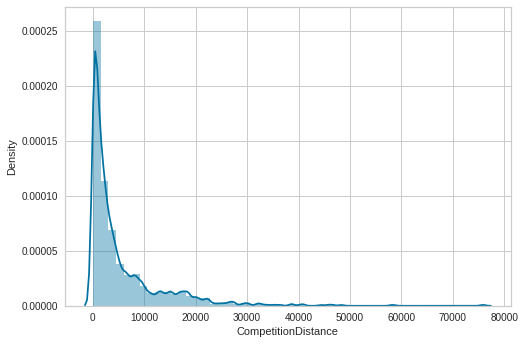

In [ ]:
#distribution plot
sns.distplot(df3['CompetitionDistance'])

The distribution is right skewed, so some transformation needs to be done.

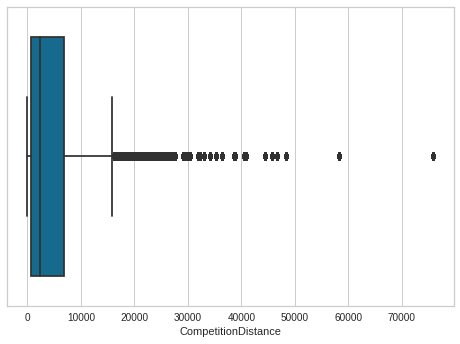

In [ ]:
#boxplot for outlier detection
sns.boxplot(df3['CompetitionDistance'])

Here, there are a lot of outliers for CompetitionDistance feature. So let's check the proportion of outliers using the interquartile range and determine the lower fence an upper fence boundary points.

Calculation of boundary points isn't done using mean+-3*std since the data isn't normal.

Checking the statistics of CompetitionDistance Feature using describe() method.

In [ ]:
df3['CompetitionDistance'].describe()

count    844338.000000
mean       5444.025402
std        7804.387332
min           0.000000
25%         700.000000
50%        2320.000000
75%        6880.000000
max       75860.000000
Name: CompetitionDistance, dtype: float64

In [ ]:
iqr=df3['CompetitionDistance'].quantile(0.75)-df3['CompetitionDistance'].quantile(0.25)
#Lower Fence boundary points
lower_bridge=df3['CompetitionDistance'].quantile(0.25)-iqr*1.5
upper_bridge=df3['CompetitionDistance'].quantile(0.75)+iqr*1.5
print(lower_bridge,upper_bridge)
#Outer Fence boundary points
lower_extreme=df3['CompetitionDistance'].quantile(0.25)-iqr*3
upper_extreme=df3['CompetitionDistance'].quantile(0.75)+iqr*3
print(lower_extreme,upper_extreme)

-8570.0 16150.0
-17840.0 25420.0


We take the outer fence boundary points since the maximum value of CompetitionDistance is 75860 so considering it as a outlier with reference to 25420 would be better.

In [ ]:
#checking the proportion of outliers
len(df3.loc[df3['CompetitionDistance']>25420])/len(df3['CompetitionDistance'])

0.029327117813008535

Only 2.9% of the values are outliers. So we don't remove them, we will check if the outliers get reduced after data transformation and do a check again.

#####CompetitionOpenSinceYear Outlier Analysis

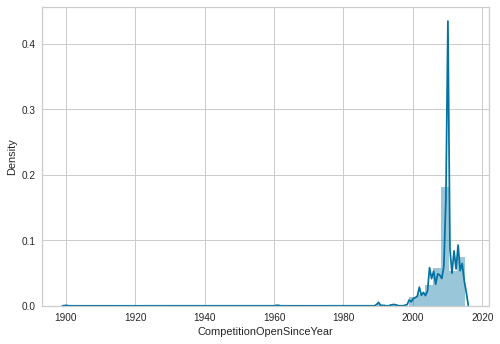

In [ ]:
#distribution plot
sns.distplot(df3['CompetitionOpenSinceYear'])

The distribution isn't normal, so some transformation needs to be done.

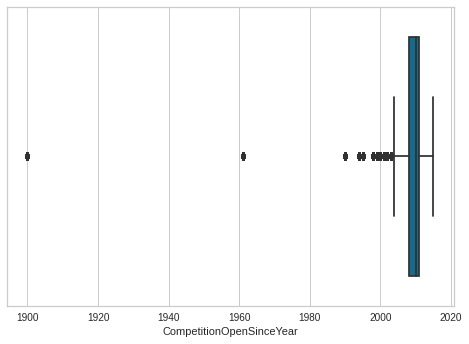

In [ ]:
#boxplot for outlier detection
sns.boxplot(df3['CompetitionOpenSinceYear'])

Here the number of outliers isn't much compared to previous features, so we won't be going to further calculation of IQR and remaining steps.

Checking Statistics of CompetitionOpenSinceYear using describe() method

In [ ]:
df3['CompetitionOpenSinceYear'].describe()

count    844338.000000
mean       2009.112023
std           4.973570
min        1900.000000
25%        2008.000000
50%        2010.000000
75%        2011.000000
max        2015.000000
Name: CompetitionOpenSinceYear, dtype: float64

#####CompetitionOpenSinceMonth Outlier Analysis

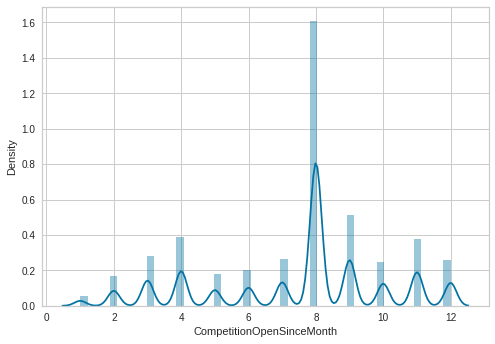

In [ ]:
#distribution plot
sns.distplot(df3['CompetitionOpenSinceMonth'])

Here the data isn't normal, so some transformation needs to be done.

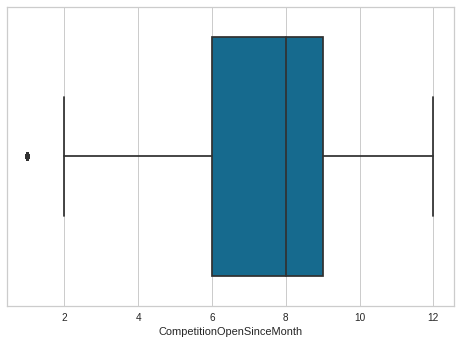

In [ ]:
#boxplot for outlier detection
sns.boxplot(df3['CompetitionOpenSinceMonth'])

The number of outliers is only one in this case. So no need for further steps.

Checking Statistics of CompetitionOpenSinceMonth 

In [ ]:
df3['CompetitionOpenSinceMonth'].describe()

count    844338.000000
mean          7.471434
std           2.675261
min           1.000000
25%           6.000000
50%           8.000000
75%           9.000000
max          12.000000
Name: CompetitionOpenSinceMonth, dtype: float64

###3. Categorical Encoding

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844338 non-null  int64  
 1   DayOfWeek                  844338 non-null  int64  
 2   Date                       844338 non-null  object 
 3   Sales                      844338 non-null  int64  
 4   Customers                  844338 non-null  int64  
 5   Open                       844338 non-null  int64  
 6   Promo                      844338 non-null  int64  
 7   StateHoliday               844338 non-null  object 
 8   SchoolHoliday              844338 non-null  int64  
 9   StoreType                  844338 non-null  object 
 10  Assortment                 844338 non-null  object 
 11  CompetitionDistance        844338 non-null  float64
 12  CompetitionOpenSinceMonth  844338 non-null  float64
 13  CompetitionOpenSinceYear   8

In [ ]:
#Label Encoding with replace
replacewith_nums = {"DayOfWeek": {1: 0, 2: 0, 3: 0, 4: 0,
                                  5: 0, 6: 1, 7:1 },
                    "StateHoliday":{'0':0,'a':1,'b':2,'c':3},
                    "Assortment":{'a':0,'b':1,'c':2},
                    "StoreType":{'a':0,'b':1,'c':2,'d':3}}
df3 = df3.select_dtypes(include=['int','object','float64'])
df3 = df3.replace(replacewith_nums)
df3.head()                          

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
0,1,0,2015-07-31,5263,555,1,1,0,1,2,0,1270.0,9.0,2008.0,0
1,2,0,2015-07-31,6064,625,1,1,0,1,0,0,570.0,11.0,2007.0,1
2,3,0,2015-07-31,8314,821,1,1,0,1,0,0,14130.0,12.0,2006.0,1
3,4,0,2015-07-31,13995,1498,1,1,0,1,2,2,620.0,9.0,2009.0,0
4,5,0,2015-07-31,4822,559,1,1,0,1,0,0,29910.0,4.0,2015.0,0


In [ ]:
#Applying Base Encoding- More Efficient than binary encoding
encoder= ce.BaseNEncoder(cols=['CompetitionOpenSinceMonth'],return_df=True,base=7)
df3 = encoder.fit_transform(df3)

In [ ]:
df3.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth_0,CompetitionOpenSinceMonth_1,CompetitionOpenSinceYear,Promo2
0,1,0,2015-07-31,5263,555,1,1,0,1,2,0,1270.0,0,1,2008.0,0
1,2,0,2015-07-31,6064,625,1,1,0,1,0,0,570.0,0,2,2007.0,1
2,3,0,2015-07-31,8314,821,1,1,0,1,0,0,14130.0,0,3,2006.0,1
3,4,0,2015-07-31,13995,1498,1,1,0,1,2,2,620.0,0,1,2009.0,0
4,5,0,2015-07-31,4822,559,1,1,0,1,0,0,29910.0,0,4,2015.0,0


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Store                        844338 non-null  int64  
 1   DayOfWeek                    844338 non-null  int64  
 2   Date                         844338 non-null  object 
 3   Sales                        844338 non-null  int64  
 4   Customers                    844338 non-null  int64  
 5   Open                         844338 non-null  int64  
 6   Promo                        844338 non-null  int64  
 7   StateHoliday                 844338 non-null  int64  
 8   SchoolHoliday                844338 non-null  int64  
 9   StoreType                    844338 non-null  int64  
 10  Assortment                   844338 non-null  int64  
 11  CompetitionDistance          844338 non-null  float64
 12  CompetitionOpenSinceMonth_0  844338 non-null  int64  
 13

####What all categorical encoding techniques have you used & why did you use those techniques?

The Categorical techniques used were Label encoding and BaseN encoding.

**Label encoding** is one of the simpler encoding techniques employed to convert categorical features to numeric features or assigning numeric categorical variables(like DayOfWeek in this case) numeric labels.Many machine learning algorithms are designed to work with numerical inputs, and cannot handle categorical variables directly. 

Here features such as **DayOfWeek, StateHoliday, Assortment and StoreType** were converted or assigned numeric labels.

For example, DayOfWeek had days of the week in numeric format. Actually DayOfWeek is an example of a discrete numeric variable falling in definite categories i.e from 1 to 7. So under label encoding the weekdays were assigned the label 0 and weekends were assigned a label 1.

The only thing to be noted under label encoding is not to give a lot of labels for a categorical variable or a numeric categorical variable. It should be limited to 5. Else, the model gives undue importance to higher values. So Higher the number of labels assigned, more will be the unfair importance to certain labels. 

**BaseN encoding** is a type of encoding that is used to represent numerical data in a format that is suitable for machine learning models. It is particularly useful when dealing with categorical features that have a large number of unique values or levels.

In BaseN encoding, the numerical values of the feature are converted into a base-N number system, where N is a chosen base. Eg:In base-7 encoding, each unique value is represented using a base-7 number, with each digit representing a power of 7. 

BaseN encoding is useful in the following cases:
1. It reduces the dimensionality of the data: By representing each unique value as a numerical value in a smaller range (e.g., 0 to N-1), BaseN encoding can reduce the dimensionality of the data and make it easier to work with in machine learning models.

2. It can improve model performance: Some machine learning algorithms, such as decision trees and random forests, work better with numerical data than with categorical data. By converting categorical data into numerical data using BaseN encoding, these algorithms can perform better.

3. It can handle large categorical features: When dealing with categorical features that have a large number of unique values, one-hot encoding can lead to a large number of sparse features, which can be computationally expensive and lead to overfitting. BaseN encoding can be a more efficient and effective way to encode these features.

Here features such as **CompetitionOpenSinceMonth and Month** were encoded using BaseN encoder since even though numeric in nature, they could be considered categorical having 12 categories.






###4. Textual Data Preprocessing



Not using in this project

###5. Feature Manipulation & Selection

####1. Feature Manipulation

In [ ]:
#Creating Day, Month, Week, Year features from Date feature
# using dt accessor to extract day               
df3['Date']= pd.to_datetime(df3['Date'])
df3['Month']=df3['Date'].dt.month
df3['Year']=df3['Date'].dt.year
df3['Week']=df3['Date'].dt.week
df3.drop(columns='Date',inplace=True,axis=1)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Store                        844338 non-null  int64  
 1   DayOfWeek                    844338 non-null  int64  
 2   Sales                        844338 non-null  int64  
 3   Customers                    844338 non-null  int64  
 4   Open                         844338 non-null  int64  
 5   Promo                        844338 non-null  int64  
 6   StateHoliday                 844338 non-null  int64  
 7   SchoolHoliday                844338 non-null  int64  
 8   StoreType                    844338 non-null  int64  
 9   Assortment                   844338 non-null  int64  
 10  CompetitionDistance          844338 non-null  float64
 11  CompetitionOpenSinceMonth_0  844338 non-null  int64  
 12  CompetitionOpenSinceMonth_1  844338 non-null  int64  
 13

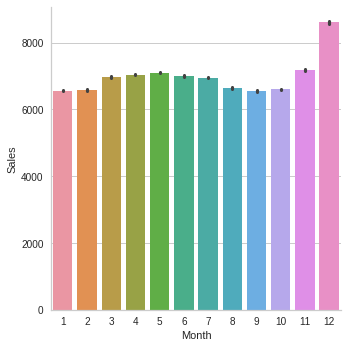

In [ ]:
#mean sales by month
sns.catplot(data=df3,x='Month',y='Sales',kind='bar')

The mean sales was maximum on December.

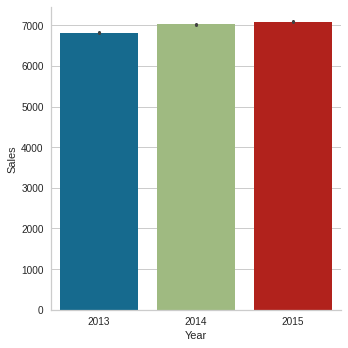

In [ ]:
#mean sales by year
sns.catplot(data=df3,x='Year',y='Sales',kind='bar')

The mean sales were maximum in 2015 and minimum in 2013.



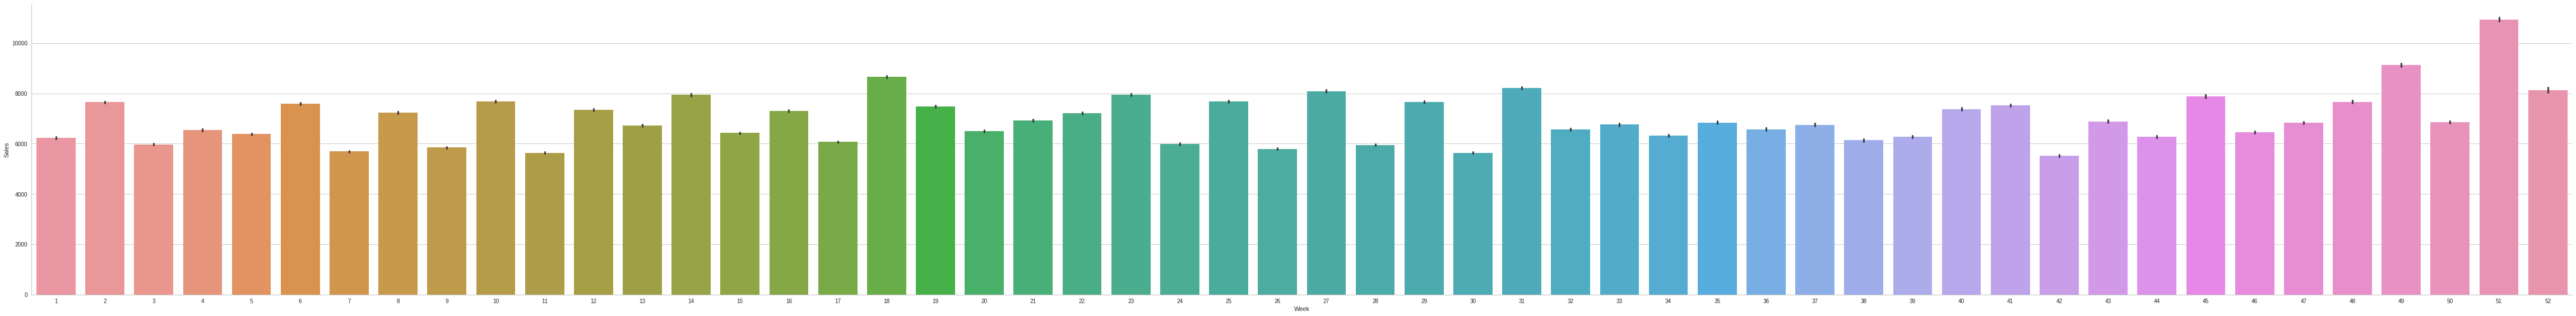

In [ ]:
#mean sales by week
sns.catplot(data=df3,x='Week',y='Sales',kind='bar',height=8,aspect=8)

The maximum mean sales were in week 51 and min mean sales in week 41.

In [ ]:
#Performing BaseN Encoding on Month Column.
encoder= ce.BaseNEncoder(cols=['Month'],return_df=True,base=7)
df3 = encoder.fit_transform(df3)

In [ ]:
df3.head(2)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth_0,CompetitionOpenSinceMonth_1,CompetitionOpenSinceYear,Promo2,Month_0,Month_1,Year,Week
0,1,0,5263,555,1,1,0,1,2,0,1270.0,0,1,2008.0,0,0,1,2015,31
1,2,0,6064,625,1,1,0,1,0,0,570.0,0,2,2007.0,1,0,1,2015,31


Created Some new features like Week,Month,Year and dropped Date and Week feature

In [ ]:
#Dropping thw week column
df3.drop(columns='Week',axis=1,inplace=True)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Store                        844338 non-null  int64  
 1   DayOfWeek                    844338 non-null  int64  
 2   Sales                        844338 non-null  int64  
 3   Customers                    844338 non-null  int64  
 4   Open                         844338 non-null  int64  
 5   Promo                        844338 non-null  int64  
 6   StateHoliday                 844338 non-null  int64  
 7   SchoolHoliday                844338 non-null  int64  
 8   StoreType                    844338 non-null  int64  
 9   Assortment                   844338 non-null  int64  
 10  CompetitionDistance          844338 non-null  float64
 11  CompetitionOpenSinceMonth_0  844338 non-null  int64  
 12  CompetitionOpenSinceMonth_1  844338 non-null  int64  
 13

####2. Feature Selection

In [ ]:
# Checking the shape of dataset
df3.shape

(844338, 18)

In [ ]:
df3['Open'].value_counts()

1    844338
Name: Open, dtype: int64

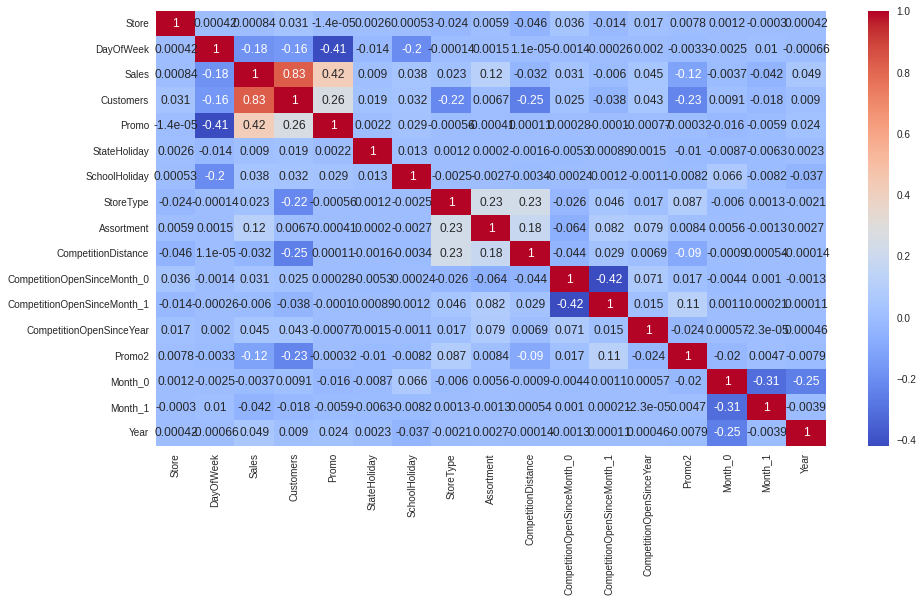

In [ ]:
#Generating Heatmap for the Independent Features
df30=df3.loc[:,df3.columns!='Open']
df10=df30
plt.figure(figsize=(15,8))
correlation = df30.corr(method='spearman')
sns.heatmap((correlation), annot=True, cmap='coolwarm')

####Detecting MultiCollinearity and Removal Of Features

In [ ]:
#Reordering the Columns
df3=df3[['Store','DayOfWeek','Customers','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionDistance','CompetitionOpenSinceYear','Promo2','Month_0','Month_1','CompetitionOpenSinceMonth_0','CompetitionOpenSinceMonth_1','Year','Sales']]


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Store                        844338 non-null  int64  
 1   DayOfWeek                    844338 non-null  int64  
 2   Customers                    844338 non-null  int64  
 3   Open                         844338 non-null  int64  
 4   Promo                        844338 non-null  int64  
 5   StateHoliday                 844338 non-null  int64  
 6   SchoolHoliday                844338 non-null  int64  
 7   StoreType                    844338 non-null  int64  
 8   Assortment                   844338 non-null  int64  
 9   CompetitionDistance          844338 non-null  float64
 10  CompetitionOpenSinceYear     844338 non-null  float64
 11  Promo2                       844338 non-null  int64  
 12  Month_0                      844338 non-null  int64  
 13

#####Variance Inflation Factor

**Variance inflation factor (VIF)** is a statistical measure used to detect the presence of multicollinearity in a regression analysis.This can cause problems in the regression analysis, such as unstable parameter estimates and decreased predictive accuracy.

Specifically, VIF is calculated as the inverse of the tolerance value, which is defined as 1 minus the R-squared value obtained by regressing each predictor variable on all the other predictor variables in the model.

A high VIF indicates a high degree of multicollinearity in the model, and values above 5 or 10 are often considered to be problematic. In this case, it may be necessary to remove one or more predictor variables from the model to reduce the level of multicollinearity.

This is a trial and error process where the VIF is first calculated for the predictor variables and then variables with High VIF values are removed and VIF is further calculated. This process is further repeated till all the VIF values are within 5.



In [ ]:
df4=df3.iloc[:,:-1]

X = df4[list(df4.columns)]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
3,7.438922e+06,Open
1,1.262764e+00,DayOfWeek
4,1.246748e+00,Promo
12,1.212088e+00,Month_0
15,1.209017e+00,CompetitionOpenSinceMonth_1
14,1.195669e+00,CompetitionOpenSinceMonth_0
2,1.166894e+00,Customers
13,1.126113e+00,Month_1
7,1.106868e+00,StoreType
11,1.105835e+00,Promo2


In [ ]:
df4.drop(columns='Open',axis=1,inplace=True)
#Dropping Column Open since it has a high multicollinearity (VIF)

In [ ]:
X = df4[list(df4.columns)]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
9,161061.572128,CompetitionOpenSinceYear
15,160945.877925,Year
2,5.384754,Customers
14,5.095253,CompetitionOpenSinceMonth_1
12,4.045658,Month_1
0,4.025937,Store
3,2.250986,Promo
10,2.204839,Promo2
7,2.062909,Assortment
6,1.972142,StoreType


In [ ]:
df4.drop(columns=['CompetitionOpenSinceYear'],axis=1,inplace=True)
#Dropping Columns since it has a high multicollinearity (VIF)

In [ ]:
X = df4[list(df4.columns)]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
14,23.077873,Year
2,5.384740,Customers
13,5.086596,CompetitionOpenSinceMonth_1
11,4.044796,Month_1
0,4.025912,Store
3,2.250967,Promo
9,2.198705,Promo2
7,2.056601,Assortment
6,1.971544,StoreType
10,1.907191,Month_0


In [ ]:
df4.drop(columns=['Year'],axis=1,inplace=True)
#Dropping Columns since it has a high multicollinearity (VIF)

In [ ]:
X = df4[list(df4.columns)]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
13,4.225999,CompetitionOpenSinceMonth_1
2,4.204912,Customers
0,3.538383,Store
11,3.327999,Month_1
3,2.177082,Promo
9,2.052118,Promo2
7,2.041949,Assortment
6,1.886004,StoreType
10,1.739676,Month_0
8,1.532334,CompetitionDistance


####What all feature selection methods have you used and why?



**Correlation Heatmap**- Depicts the effect of the independent features with respect to the dependent variable. Generally only independent variables are plotted. But we want to know the correlation of each independent variable with the target variable. Higher the correlation coefficient values of the independent variable to the target variable, greater is its effect on the target variable.

**Variance Inflation Factor (VIF)** is a statistical measure used to identify the extent of multicollinearity (i.e., high correlation) between independent variables in a regression model. VIF calculates a score for each independent variable, which indicates how much the variance of the estimated regression coefficient is increased due to multicollinearity with other independent variables.

####Which all features you found important and why?



Through the correlation heatmap, the Customers features was the most important as Sales was concerened followed by Promo.

The limitation of the heatmap is that it fails to detect multicollinearity with the independent variables. So we proceed with VIF. 
Through VIF, all the features with high VIF values were removed through an iterative process till all the remaining features obtained were within acceptable VIF limits.

###6. Data Transformation

In [ ]:
#Adding back sales column
df6=df3['Sales']
df4=pd.concat([df4,df6],axis=1)


Outlier Observations were done in Outlier Analysis, here the distribution of features are observed and then data is transformed accordingly followed by removal of outliers if it is significant.

###Distribution Of Target Feature- Sales

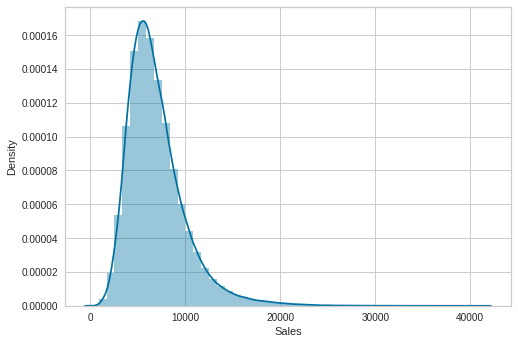

In [ ]:
sns.distplot(df4['Sales'])
# Still the data is moderately skewed. So we apply some transformations to the Sales column.

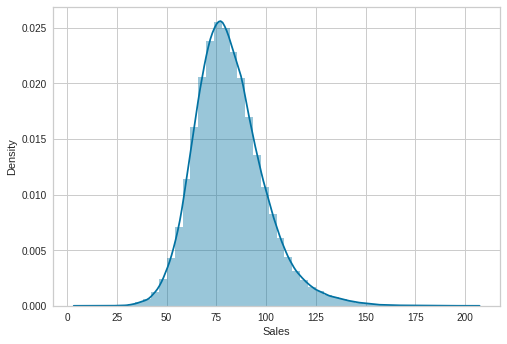

In [ ]:
#Applying Square Root Transformation to the Sales feature for moderate skew
df4['Sales']=np.sqrt(df4['Sales'])
sns.distplot(df4['Sales'])

Now the distribution Obtained is almost Normal, which is very important for a regression based model.

In [ ]:
#statistics of the feature
df4['Sales'].describe()

count    844338.000000
mean         81.554005
std          17.461492
min           6.782330
25%          69.706528
50%          79.806015
75%          91.433036
max         203.840624
Name: Sales, dtype: float64

In [ ]:
#calculating IQR
iqr=df4['Sales'].quantile(0.75)-df4['Sales'].quantile(0.25)
#Lower Fence boundary points
lower_bridge=df4['Sales'].quantile(0.25)-iqr*1.5
upper_bridge=df4['Sales'].quantile(0.75)+iqr*1.5
print(lower_bridge,upper_bridge)
#Outer Fence boundary points
lower_extreme=df4['Sales'].quantile(0.25)-iqr*3
upper_extreme=df4['Sales'].quantile(0.75)+iqr*3
print(lower_extreme,upper_extreme)

37.11676577048496 124.02279750618851
4.527003869596129 156.61255940707736


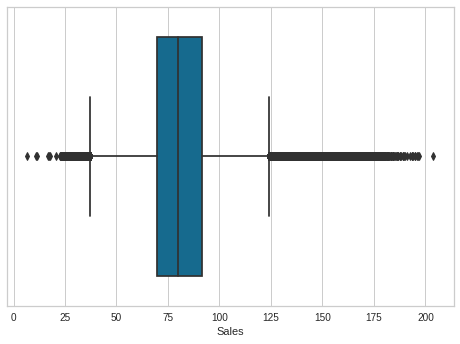

In [ ]:
#boxplot for depicting outliers
sns.boxplot(df4['Sales'])

We will check the number of outliers that exceed the outer fence points. After transformation, it is observed that there are some outliers excceding the right outer fence boundary points.

In [ ]:
len(df4.loc[df4['Sales']>156])/len(df4['Sales'])

0.0011038233503644274

Since only 0.1% of the sales data are outliers, there is no need for their removal and also in reality, extremely high sales could be made.

####Distribution of Customers Feature

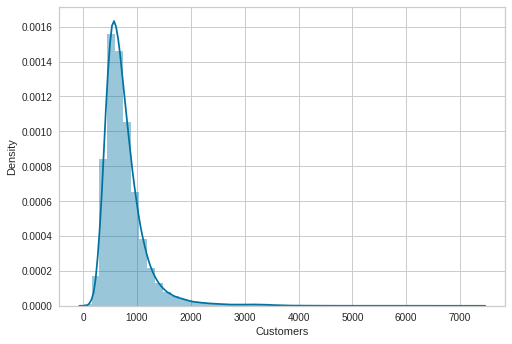

In [ ]:
sns.distplot(df4['Customers'])
#the distribution shows moderate skewness

The data appears to be moderately skewed. So applying Square Root Transformation.

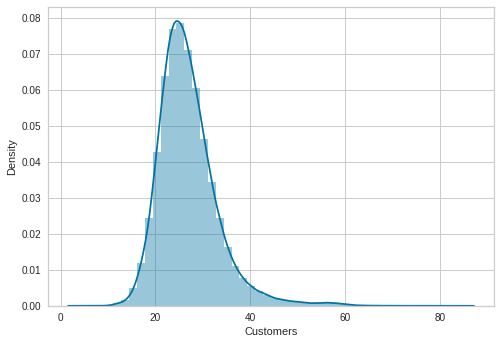

In [ ]:
#Applying square root transformation for moderately skewed data
df4['Customers']=np.sqrt(df4['Customers'])
sns.distplot(df4['Customers'])

Now an almost normal distribution is obtained, which is great for the model to learn from in regression

In [ ]:
df4['Customers'].describe()

count    844338.000000
mean         26.892133
std           6.292088
min           2.828427
25%          22.781571
50%          26.000000
75%          29.883106
max          85.953476
Name: Customers, dtype: float64

checking for outliers after transformation

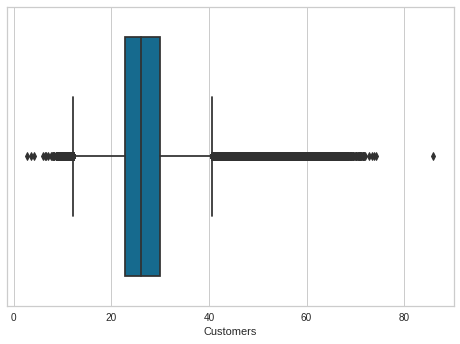

In [ ]:
#boxplot for outlier depiction
sns.boxplot(df4['Customers'])
#The Customers feature has a lot of outliers.

In [ ]:
iqr=df4['Customers'].quantile(0.75)-df4['Customers'].quantile(0.25)
#Lower Fence boundary points
lower_bridge=df4['Customers'].quantile(0.25)-iqr*1.5
upper_bridge=df4['Customers'].quantile(0.75)+iqr*1.5
print(lower_bridge,upper_bridge)
#Outer Fence boundary points
lower_extreme=df4['Customers'].quantile(0.25)-iqr*3
upper_extreme=df4['Customers'].quantile(0.75)+iqr*3
print(lower_extreme,upper_extreme)

12.129270357020783 40.535406737736125
1.4769692142525308 51.18770788050438


We will check the number of outliers that exceed the outer fence points. After transformation, it is observed that there are some outliers excceding the right outer fence boundary points.

In [ ]:
len(df4.loc[df4['Customers']>51.18])/len(df4['Customers'])

0.0077954563219942725

Since only 0.7% of the sales data are outliers, there is no need for their removal and also in reality, a lot of customers can come to the store to make purchases.

###Distribution Of CompetitionDistance 

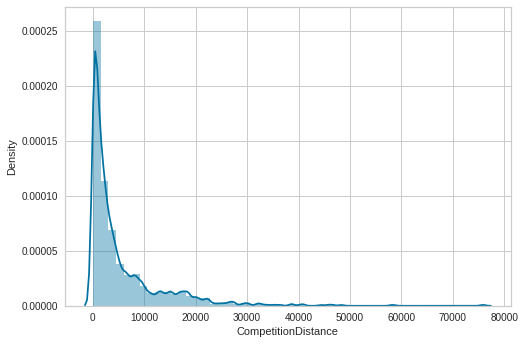

In [ ]:
##distribution of data
sns.distplot(df4['CompetitionDistance'])

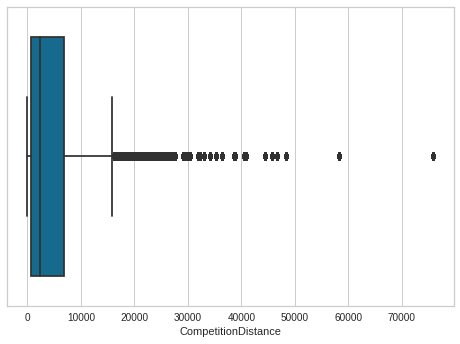

In [ ]:
#boxplot for depicting outliers
sns.boxplot(df4['CompetitionDistance'])

Data Appears to be highly skewed, so we apply logarithmic transformation.

In [ ]:
#transformation
df4['CompetitionDistance']=np.log(df4['CompetitionDistance'])


OverflowError: ignored

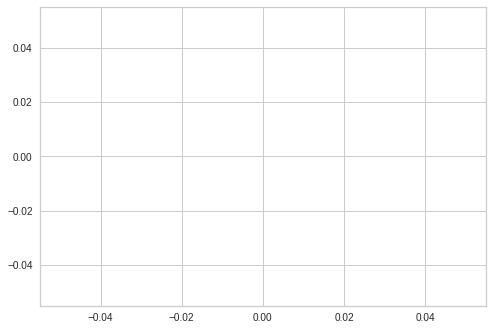

In [ ]:
sns.distplot(df4['CompetitionDistance'])

####Since we get an error message, we have to remove the float infinity values.So after removal, we plot the distplot for competition distance.

In [ ]:
# Replace infinite updated data with nan
df4.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df4.dropna(inplace=True)

In [ ]:
df4.shape

(842152, 15)

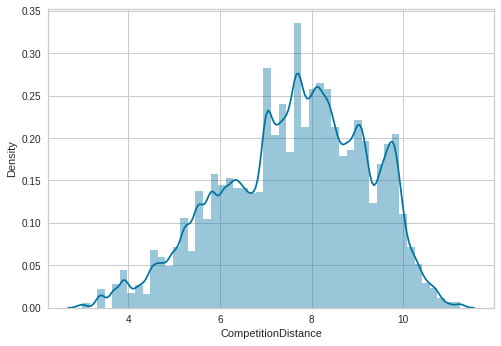

In [ ]:
#distribution of transformed data
sns.distplot(df4['CompetitionDistance'])

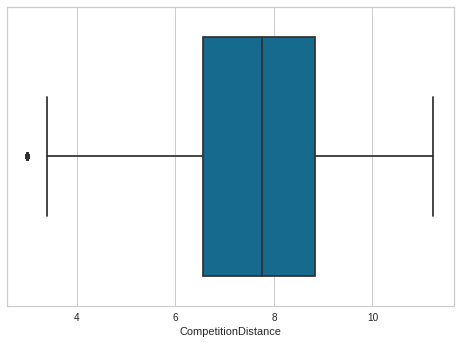

In [ ]:
#boxplot for depicting outliers
sns.boxplot(df4['CompetitionDistance'])

Although the distribution obtained isn't approximately normal, the outliers were considerably reduced thereby not requiring the need for outlier treatment

###7. Data Scaling

In [ ]:
# getting the statistics for the features
df4.describe()

,Store,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Month_0,Month_1,CompetitionOpenSinceMonth_0,CompetitionOpenSinceMonth_1,Sales
count,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000
mean,558.373097,0.174872,26.902419,0.446352,0.001418,0.193593,1.203576,0.937062,7.642964,0.499226,0.412379,2.988863,0.254061,3.778678,81.578242
std,321.921616,0.379858,6.291410,0.497114,0.047602,0.395114,1.362680,0.993123,1.562959,0.500000,0.492263,1.844442,0.435332,2.110482,17.457829
min,1.000000,0.000000,2.828427,0.000000,0.000000,0.000000,0.000000,0.000000,2.995732,0.000000,0.000000,0.000000,0.000000,0.000000,6.782330
25%,280.000000,0.000000,22.803509,0.000000,0.000000,0.000000,0.000000,0.000000,6.565265,0.000000,0.000000,1.000000,0.000000,2.000000,69.742383
50%,557.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.749322,0.000000,0.000000,3.000000,0.000000,4.000000,79.831072
75%,837.000000,0.000000,29.883106,1.000000,0.000000,0.000000,3.000000,2.000000,8.837826,1.000000,1.000000,5.000000,1.000000,6.000000,91.449440
max,1115.000000,1.000000,85.953476,1.000000,3.000000,1.000000,3.000000,2.000000,11.236645,1.000000,1.000000,6.000000,1.000000,6.000000,203.840624


####Which method have you used to scale you data and why ?


When you are using an algorithm that assumes your features have a similar range, you should use feature scaling.

If the ranges of your features differ much then you should use feature scaling. If the range does not vary a lot like one of them is between 0 and 2 and the other one is between -1 and 0.5 then you can leave them as it is. However, you should use feature scaling if the ranges are, for example, between -2 and 2 and between -100 and 100.

Use Standardization when your data follows Gaussian distribution. Use Normalization when your data does not follow Gaussian distribution.

So, in my data only the **Customers** column is having large data difference and is not following gaussian distribution. That's why, I have used normalization technique



In [ ]:
df4.shape

(842152, 15)

In [ ]:
# Normalizing the required column
df4['Customers'] = (df4['Customers']-df4['Customers'].min())/(df4['Customers'].max()-df4['Customers'].min())
df4['Customers']

0          0.249383
1          0.266726
2          0.310673
3          0.431586
4          0.250403
             ...   
1016776    0.252178
1016827    0.552494
1016863    0.390961
1017042    0.353745
1017190    0.416901
Name: Customers, Length: 842152, dtype: float64

In [ ]:
df4.describe()

,Store,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Month_0,Month_1,CompetitionOpenSinceMonth_0,CompetitionOpenSinceMonth_1,Sales
count,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000,842152.000000
mean,558.373097,0.174872,0.289612,0.446352,0.001418,0.193593,1.203576,0.937062,7.642964,0.499226,0.412379,2.988863,0.254061,3.778678,81.578242
std,321.921616,0.379858,0.075686,0.497114,0.047602,0.395114,1.362680,0.993123,1.562959,0.500000,0.492263,1.844442,0.435332,2.110482,17.457829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.995732,0.000000,0.000000,0.000000,0.000000,0.000000,6.782330
25%,280.000000,0.000000,0.240302,0.000000,0.000000,0.000000,0.000000,0.000000,6.565265,0.000000,0.000000,1.000000,0.000000,2.000000,69.742383
50%,557.000000,0.000000,0.278756,0.000000,0.000000,0.000000,0.000000,0.000000,7.749322,0.000000,0.000000,3.000000,0.000000,4.000000,79.831072
75%,837.000000,0.000000,0.325470,1.000000,0.000000,0.000000,3.000000,2.000000,8.837826,1.000000,1.000000,5.000000,1.000000,6.000000,91.449440
max,1115.000000,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000,2.000000,11.236645,1.000000,1.000000,6.000000,1.000000,6.000000,203.840624


###8. Dimesionality Reduction

Dimensionality Reduction isn't needed in this case, as the dataset doesn't suffer from the curse of multidimensionality and necessary encoding techniques have been performed on the categorical features.

###9. Data Splitting

Before going into splitting the dataset for regression modelling, we have to check why regression is the way forward.

So we deal with the basic assumptions of regression.

#####1. Linearity

Linear regression needs the relationship between the independent and dependent variables to be linear. Let's use a pair plot to check the relation of independent variables with the Sales variable

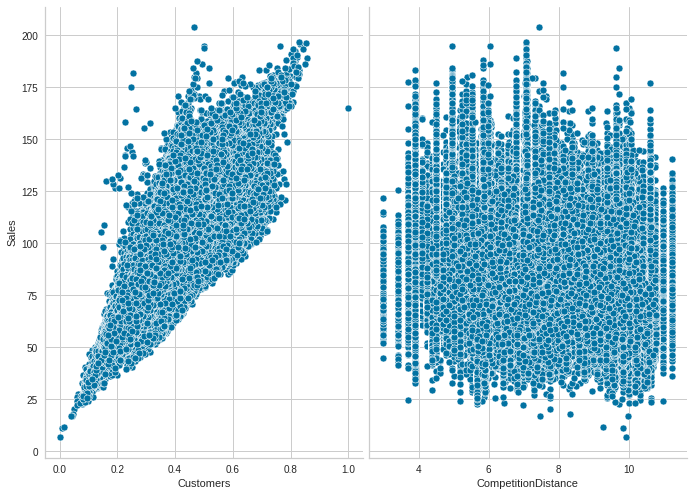

In [ ]:
# visualize the relationship between the features and the response using scatterplots
p = sns.pairplot(df4, x_vars=['Customers','CompetitionDistance'], y_vars='Sales', size=7, aspect=0.7)


By looking at the plots we can see that with the Sales variable the none of the independent variables form an accurately linear shape except for customers. So it shows that a linear regression fitting might not be the best model for it. A linear model might not be able to efficiently explain the data in terms of variability, prediction accuracy etc.

Now rest of the assumptions require us to perform the regression before we can even check for them. So let's perform regression on it.

###Performing Train Test Split for Regression

In [ ]:
df4.columns

Index(['Store', 'DayOfWeek', 'Customers', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'Promo2', 'Month_0', 'Month_1', 'CompetitionOpenSinceMonth_0',
       'CompetitionOpenSinceMonth_1', 'Sales'],
      dtype='object')

In [ ]:
#Splitting the model into x and y
x=df4.iloc[:,:-1]
y=df4['Sales']

In [ ]:
x.shape

(842152, 14)

In [ ]:
y.shape

(842152,)

In [ ]:
#Splitting
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

What data splitting ratio have you used and why?

There are two competing concerns: with less training data, your parameter estimates have greater variance. With less testing data, your performance statistic will have greater variance. Broadly speaking you should be concerned with dividing data such that neither variance is too high, which is more to do with the absolute number of instances in each category rather than the percentage.

If you have a total of 100 instances, you're probably stuck with cross validation as no single split is going to give you satisfactory variance in your estimates. If you have 100,000 instances, it doesn't really matter whether you choose an 80:20 split or a 90:10 split (indeed you may choose to use less training data if your method is particularly computationally intensive).

You'd be surprised to find out that 80/20 is quite a commonly occurring ratio, often referred to as the Pareto principle. It's usually a safe bet if you use that ratio.

In this case the training dataset is small, that's why I have taken 80:20 ratio.

##**7. ML Model Implementation**

### ML Model - 1 - **Implementing Linear Regression**

Linear regression is a type of supervised learning algorithm in machine learning that is used to model the relationship between a dependent variable (also known as the response variable or target variable) and one or more independent variables (also known as predictors or features). The goal of linear regression is to find the best linear relationship between the independent variables and the dependent variable, which can then be used to make predictions on new data.

In linear regression, the relationship between the independent variables and the dependent variable is modeled as a linear equation:

y=b0+b1x1+b2x2+b3x3...+bnxn

where
y is the dependent variable
x1, x2, ..., xn are the independent variables
b0 is the intercept (also known as the bias term)
b1, b2, ..., bn are the coefficients (also known as the weights or parameters)

the value of the parameters can be found out by the gradient descent algorithm which is an iterative optimization algorithm that minimizes the loss function. In the context of linear regression, gradient descent can be used to find the values of the parameters that minimize the sum of the squared differences between the predicted values and the actual values. 

Evaluation Metrics For Linear Regression:

1. Mean Squared Error (MSE): This is the most commonly used metric for evaluating the performance of a linear regression model. It calculates the average squared difference between the predicted and actual values of the dependent variable. A lower MSE indicates better performance.

2. Root Mean Squared Error (RMSE): This is the square root of the MSE, and is also commonly used to evaluate the performance of a linear regression model. It has the same interpretation as the MSE, but is in the same units as the dependent variable, making it easier to interpret.

3. R-squared (R2): This is a statistical measure that represents the proportion of the variance in the dependent variable that is explained by the independent variables in the model. R-squared ranges from 0 to 1, with higher values indicating better performance.

4. Adjusted R2:R-squared has a limitation that it always increases as new independent variables are added to the model, even if they are not relevant or do not contribute much to the explanation of the dependent variable. This can result in overfitting, where the model performs well on the training data but poorly on new data. Adjusted R-squared is a modification of the R-squared metric that addresses this limitation. It adjusts the R-squared value based on the number of independent variables in the model. It penalizes the addition of new independent variables that do not improve the performance of the model, and thereby prevents overfitting. The adjusted R-squared value is always lower than the R-squared value, and decreases when new independent variables are added to the model that do not improve its performance. A higher adjusted R-squared value indicates a better model fit that is less likely to overfit the data.

4. Mean Absolute Error (MAE): This is the average absolute difference between the predicted and actual values of the dependent variable. MAE is less sensitive to outliers than MSE, but can be more difficult to interpret.

In [ ]:
#creating a function that computes the various metrics
#Evaluate Metrics
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    Adj_r2 = 1 - (1-r2_square) * (len(true)-1)/(len(true)-X.shape[1]-1)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('Adjusted R2 Square',Adj_r2)
    print('__________________________________')

In [ ]:
#For Linear regression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [ ]:
#coefficients for the linear regression model
coeff_df = pd.DataFrame(lin_reg.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Store,-0.000844
DayOfWeek,1.356578
Customers,203.812125
Promo,7.417445
StateHoliday,-7.018200
SchoolHoliday,0.747613
StoreType,1.681675
Assortment,0.909833
CompetitionDistance,1.654001
Promo2,2.406284


In [ ]:
#Evaluation Metrics
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 5.599513613303392
MSE: 57.660407598335176
RMSE: 7.593445041503571
R2 Square 0.8111035852302224
Adjusted R2 Square 0.8110878827446701
__________________________________
Train set evaluation:
_____________________________________
MAE: 5.604168190416859
MSE: 57.690311108367
RMSE: 7.595413820745187
R2 Square 0.8106383104057335
Adjusted R2 Square 0.8106343753603957
__________________________________


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

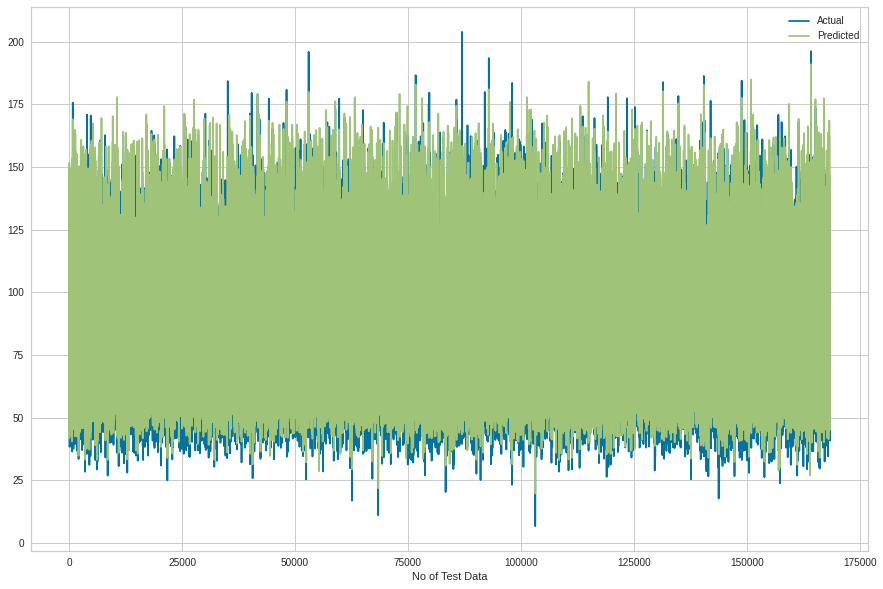

In [ ]:
#Plot the figure
plt.rcParams['agg.path.chunksize'] = 10000
plt.figure(figsize=(15,10))
plt.plot(np.array(y_test))
plt.plot(test_pred)
plt.legend(["Actual","Predicted"])
plt.xlabel('No of Test Data')
plt.show()

From the above plot, it is observed that for the data points, the predicted values are almost matching the actual values thereby creating a good model.

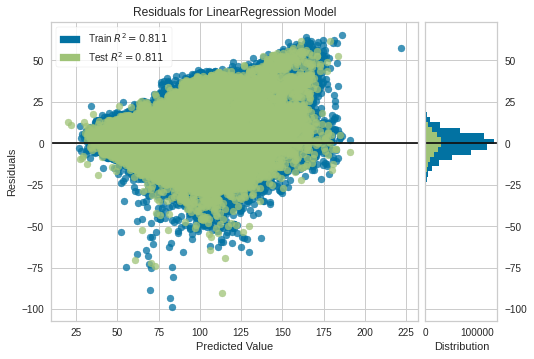

In [ ]:
# Creating the Residuals Plot
visualizer = ResidualsPlot(lin_reg, hist=True)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)

# Showing plot
visualizer.show()

From the above plot, it could be observed that the residuals are exhibiting homoescadisticity and the error terms are normally distributed for both the training data and the test data which is good for regression based models.

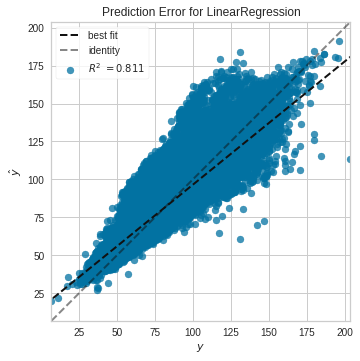

In [ ]:
#Prediction Error Plot
predictor = PredictionError(lin_reg)
predictor.fit(X_train, y_train) 
predictor.score(X_test, y_test)

# Showing plot
predictor.show()

From the above plot, the R2 value is 0.81 for the test data which is good for the model built and the best fit line is also closer to the identity line which is a 45 degree line.

#####2. Mean of Residuals

Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero or close to it. So let's find out.

In [ ]:
#Finding mean of Residuals
residuals = y_train.values-train_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -2.5595910940396747e-14


The mean of residuals is negative and a very small number that is close to zero, thereby not violating this assumption

#####3. Check for Normality of error terms/residuals


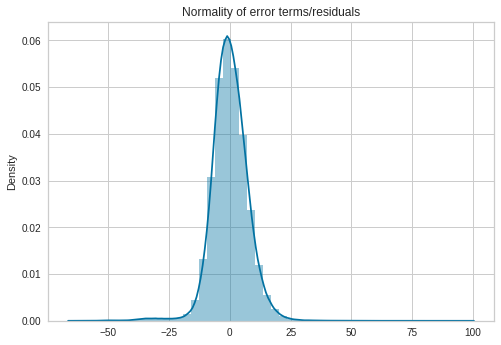

In [ ]:
#Distplot for Normality of error terms/residuals
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

The residual terms are pretty much normally distributed for the number of test points we took. Remember the central limit theorem which says that as the sample size increases the distribution tends to be normal. A skew is also visible from the plot. It's very difficult to get perfect curves, distributions in real life data.

#####4. Homoescdasticity of residuals

Homoscedasticity in a model means that the error is constant along the values of the dependent variable. The best way for checking homoscedasticity is to make a scatterplot with the residuals against the dependent variable.

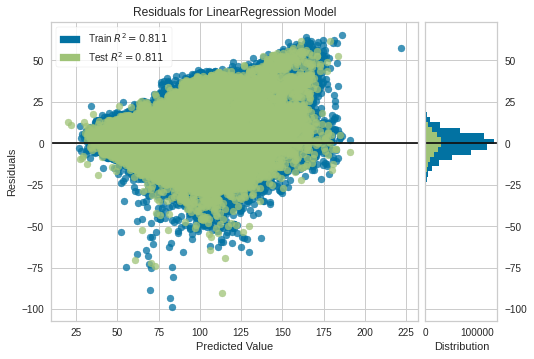

In [ ]:
# Creating the Residuals Plot
visualizer = ResidualsPlot(lin_reg)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)

# Showing plot
visualizer.show()

From the above plot, the error terms are almost homoscedastic. Thereby not violating the assumption.

Thereby all the major assumptions aren't violated and hence linear regression is a good way for model building for this project.

####2. Cross Validation and Hyperparameter Tuning

Here,K-fold cross validation is used.

K-fold cross-validation is a popular technique used to evaluate the performance of machine learning models. It involves splitting the original dataset into k equally sized partitions or folds, where k is a positive integer.

The general procedure for k-fold cross-validation is as follows:

1. The original dataset is randomly divided into k equally sized folds.
2.The model is trained on k-1 folds, and the remaining fold is used for validation.
3.The model's performance is evaluated on the validation set.
4.Steps 2-3 are repeated k times, with each of the k folds used exactly once for validation.
5.The performance of the model is averaged across the k folds to obtain an overall estimate of its performance.

K-fold cross-validation can be used to estimate the performance of a machine learning model and to select hyperparameters that optimize the model's performance. It can also help to prevent overfitting, by providing a more accurate estimate of a model's performance on new, unseen data.

In [ ]:
reg = LinearRegression()
# Using 5 fold cross validation
k = 5


# uses R^2 as score 
cv_result = cross_val_score(lin_reg,x,y,cv=k)
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [0.79152597 0.81627861 0.81099229 0.81152697 0.80641858]
CV scores average:  0.8073484852137021


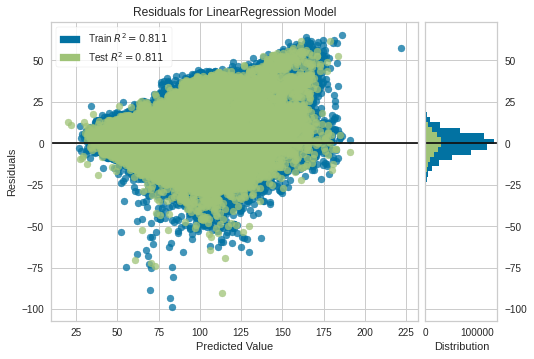

In [ ]:
# Creating the Residuals Plot
visualizer = ResidualsPlot(reg, hist=True)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)

# Showing plot
visualizer.show()

From the above plot, it could be observed that the residuals are exhibiting homoescadisticity and the error terms are normally distributed for both the training data and the test data which is good for regression based models.

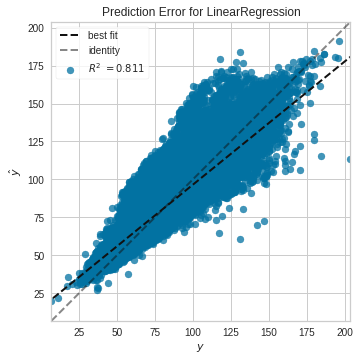

In [ ]:
predictor = PredictionError(reg)
predictor.fit(X_train, y_train) 
predictor.score(X_test, y_test)

# Showing plot
predictor.show()

From the above plot, the R2 value is 0.81 for the test data which is good for the model built and the best fit line is also closer to the identity line which is a 45 degree line.

###ML Model - 2 - **Implementing Lasso Regression**

**Lasso regression**, also known as **L1 regularization**, is a linear regression technique that adds a penalty term to the cost function of the regression model in order to prevent overfitting and select the most important features. The penalty term is based on the sum of the absolute values of the regression coefficients, and it encourages some of the coefficients to be set to zero. This has the effect of shrinking the coefficients of less important features towards zero, effectively removing them from the model.

Lasso regression is particularly useful when dealing with datasets that have many features and some of them are irrelevant or redundant. By shrinking the coefficients of these features to zero, Lasso can improve the interpretability of the model, reduce the risk of overfitting, and enhance the generalizability of the model to new data.

In [ ]:
#Lasso Regression
lasso = Lasso(alpha=0.001, tol=0.0001, random_state=42)
lasso.fit(X_train, y_train)

test_pred = lasso.predict(X_test)
train_pred = lasso.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)



Test set evaluation:
_____________________________________
MAE: 5.600629291464235
MSE: 57.65873665137431
RMSE: 7.5933350150888455
R2 Square 0.8111090592791119
Adjusted R2 Square 0.8110933572486035
__________________________________
Train set evaluation:
_____________________________________
MAE: 5.605352880538929
MSE: 57.69106631732143
RMSE: 7.59546353538225
R2 Square 0.8106358315207898
Adjusted R2 Square 0.8106318964239394
__________________________________


###1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

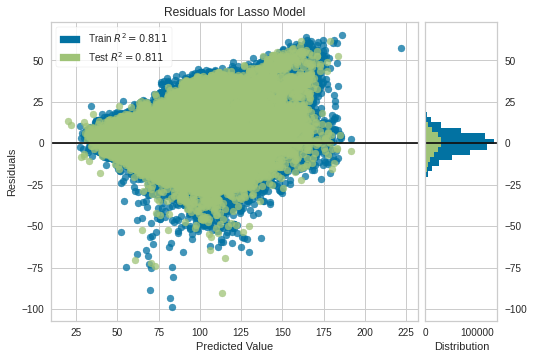

In [ ]:
# Creating the Residuals Plot
visualizer = ResidualsPlot(lasso, hist=True)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)

# Showing plot
visualizer.show()

From the above plot, it could be observed that the residuals are exhibiting homoescadisticity and the error terms are normally distributed for both the training data and the test data which is good for regression based models.

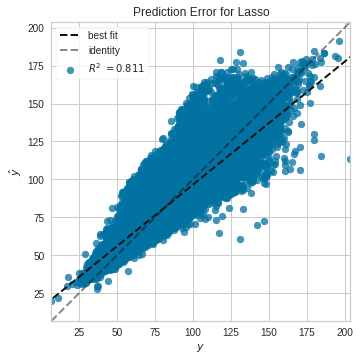

In [ ]:
predictor = PredictionError(lasso)
predictor.fit(X_train, y_train) 
predictor.score(X_test, y_test)

# Showing plot
predictor.show()

From the above plot, the R2 value is 0.81 for the test data which is good for the model built and the best fit line is also closer to the identity line which is a 45 degree line.

###2. Cross- Validation & Hyperparameter Tuning

Hyperparameter tuning is the process of selecting the best hyperparameters for a machine learning model. Hyperparameters are configuration variables that are set before the model is trained and can affect the performance of the model. Examples of hyperparameters include learning rate, regularization strength, and the number of hidden layers in a neural network.

Hyperparameter tuning is important because selecting the right hyperparameters can significantly improve the performance of the model. However, there is no one-size-fits-all approach to hyperparameter tuning, and the best hyperparameters can vary depending on the dataset and the specific problem.

GridSearchCV(Grid Search Cross Validation) is a brute-force approach to hyperparameter tuning that is widely used in machine learning. It involves defining a set of hyperparameters and their possible values, and creating a grid of all possible combinations of hyperparameters. The model is then trained and evaluated on each combination of hyperparameters using cross-validation, which helps to avoid overfitting.

In [ ]:
#Lasso Regression with Cross Validation and Hypeparameter Tuning
lasso1 = Lasso(selection='random',random_state=0)
parameters = {'alpha': [1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,]}
lasso_regressor = GridSearchCV(lasso1, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

test_pred = lasso_regressor.predict(X_test)
train_pred = lasso_regressor.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)

Test set evaluation:
_____________________________________
MAE: 5.59952463390013
MSE: 57.66038287030879
RMSE: 7.5934434132552004
R2 Square 0.8111036662396313
Adjusted R2 Square 0.811087963760813
__________________________________
Train set evaluation:
_____________________________________
MAE: 5.604179845808356
MSE: 57.69031118423147
RMSE: 7.595413825739284
R2 Square 0.8106383101567173
Adjusted R2 Square 0.8106343751113744
__________________________________
The best fit alpha value is found out to be : {'alpha': 1e-05}


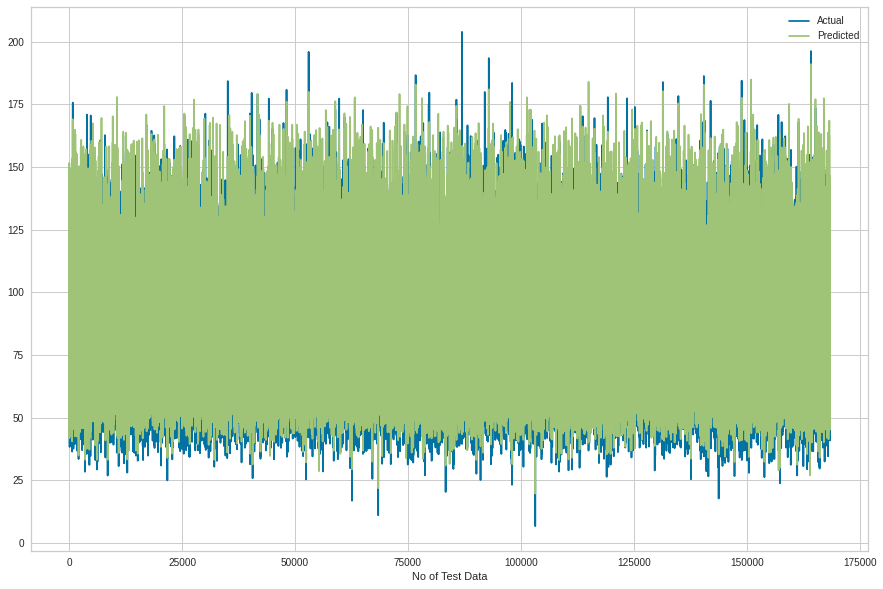

In [ ]:
#Plot the figure
plt.rcParams['agg.path.chunksize'] = 10000
plt.figure(figsize=(15,10))
plt.plot(np.array(y_test))
plt.plot(test_pred)
plt.legend(["Actual","Predicted"])
plt.xlabel('No of Test Data')
plt.show()

From the above plot, it is observed that for the data points, the predicted values are almost matching the actual values thereby creating a good model.

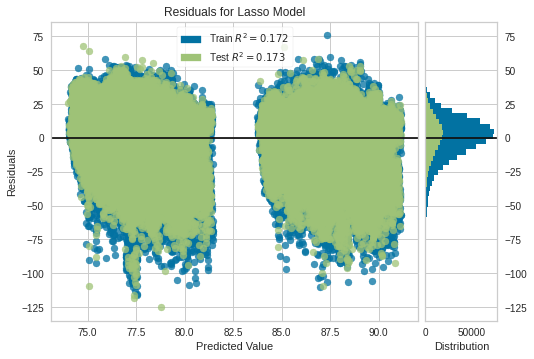

In [ ]:
# Creating the Residuals Plot
visualizer = ResidualsPlot(lasso1, hist=True)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)

# Showing plot
visualizer.show()

From the above plot, it could be observed that the residuals are exhibiting homoescadisticity and the error terms are normally distributed for both the training data and the test data which is good for regression based models. Although the actual R2 score is 0.81 for both train and test data.

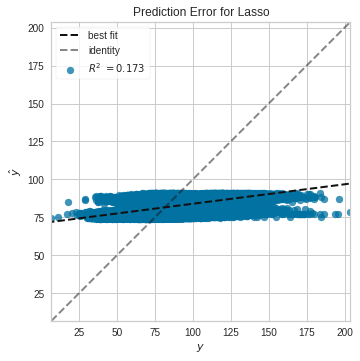

In [ ]:
#Prediction Error Plot
predictor = PredictionError(lasso1)
predictor.fit(X_train, y_train) 
predictor.score(X_test, y_test)

# Showing plot
predictor.show()

The above plot hasn't plotted the accurate R2 score of 0.81 for the model, hence not a recommended plot in this case.

##ML Model - 3 - **Implementing Ridge Regression**

**Ridge regression**, also known as **L2 regularization**, is a linear regression technique that adds a penalty term to the cost function of the regression model in order to prevent overfitting and improve the stability of the model. The penalty term is based on the sum of the squares of the regression coefficients, and it encourages the coefficients to be small but not necessarily zero.

Ridge regression is particularly useful when dealing with datasets that have high collinearity or multicollinearity, which occurs when the features are highly correlated with each other. In such cases, the regression coefficients can become unstable and highly sensitive to small changes in the data, which can lead to overfitting and poor performance on new data. By adding a penalty term that encourages the coefficients to be small, Ridge regression can reduce the impact of collinearity and improve the robustness of the model.

In [ ]:
#Ridge Regression

ridge = Ridge(alpha=0.001, solver='cholesky', tol=0.0001, random_state=42)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)

test_pred = ridge.predict(X_test)
train_pred = ridge.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


Test set evaluation:
_____________________________________
MAE: 5.599513969724666
MSE: 57.66040738592116
RMSE: 7.593445027516902
R2 Square 0.8111035859260942
Adjusted R2 Square 0.8110878834405998
__________________________________
Train set evaluation:
_____________________________________
MAE: 5.604168542600735
MSE: 57.69031110838757
RMSE: 7.595413820746541
R2 Square 0.810638310405666
Adjusted R2 Square 0.8106343753603282
__________________________________


###1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


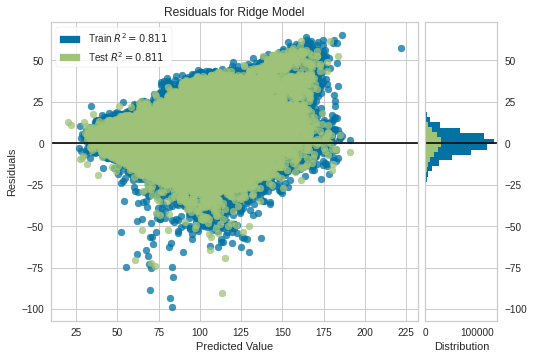

In [ ]:
# Creating the Residuals Plot
visualizer = ResidualsPlot(ridge, hist=True)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)

# Showing plot
visualizer.show()

From the above plot, it could be observed that the residuals are exhibiting homoescadisticity and the error terms are normally distributed for both the training data and the test data which is good for regression based models.

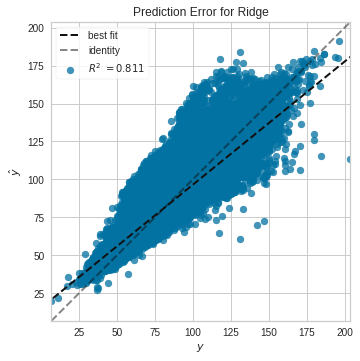

In [ ]:
#Prediction Error Plot
predictor = PredictionError(ridge)
predictor.fit(X_train, y_train) 
predictor.score(X_test, y_test)

# Showing plot
predictor.show()

From the above plot, the R2 value is 0.81 for the test data which is good for the model built and the best fit line is also closer to the identity line which is a 45 degree line.

###2. Cross- Validation & Hyperparameter Tuning

In [ ]:
#cross validation and hyperparameter tuning for ridge regression

ridge1 =Ridge( solver='cholesky', tol=0.0001, random_state=42)
parameters = {'alpha': [1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,]}
ridge_regressor = GridSearchCV(ridge1, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)

test_pred = ridge_regressor.predict(X_test)
train_pred = ridge_regressor.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)

Test set evaluation:
_____________________________________
MAE: 5.599517177505446
MSE: 57.660405476056084
RMSE: 7.593444901759417
R2 Square 0.8111035921828427
Adjusted R2 Square 0.8110878896978684
__________________________________
Train set evaluation:
_____________________________________
MAE: 5.604171712441998
MSE: 57.690311110424574
RMSE: 7.595413820880635
R2 Square 0.8106383103989798
Adjusted R2 Square 0.8106343753536419
__________________________________
The best fit alpha value is found out to be : {'alpha': 0.01}


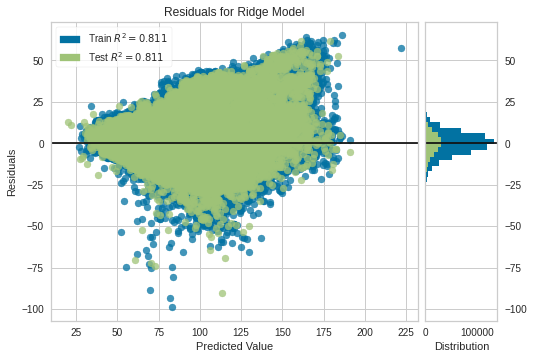

In [ ]:
# Creating the Residuals Plot
visualizer = ResidualsPlot(ridge1,hist=True)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)

# Showing plot
visualizer.show()

From the above plot, it could be observed that the residuals are exhibiting homoescadisticity and the error terms are normally distributed for both the training data and the test data which is good for regression based models.

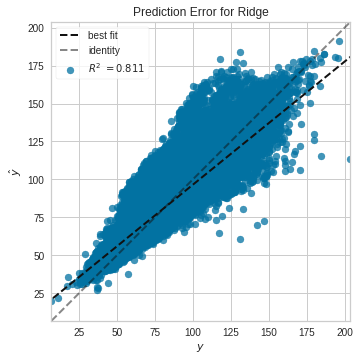

In [ ]:
#Prediction Error Plot
predictor = PredictionError(ridge1)
predictor.fit(X_train, y_train) 
predictor.score(X_test, y_test)

# Showing plot
predictor.show()

From the above plot, the R2 value is 0.81 for the test data which is good for the model built and the best fit line is also closer to the identity line which is a 45 degree line.

##ML Model - 4 - **Implementing ElasticNet Regression**

**ElasticNet regression** is a linear regression technique that combines the penalties of both **L1 (Lasso) and L2 (Ridge) regularization methods**. It is used to overcome the limitations of each method while taking advantage of their strengths.

In ElasticNet regression, the loss function is modified to include both L1 and L2 regularization penalties. The L1 penalty promotes sparsity in the coefficient values, meaning that it encourages some coefficients to be exactly zero, while the L2 penalty encourages small, but non-zero coefficients. The hyperparameter alpha controls the trade-off between L1 and L2 penalties, and a value of zero corresponds to the ordinary least squares regression.

The main advantage of ElasticNet regression is its ability to handle high-dimensional data with a large number of input features, where the number of features is much larger than the number of samples. It is also useful when there is multicollinearity between the input features, which means that some of the features are highly correlated. In this case, ElasticNet regression can select a subset of the most informative features while keeping the coefficients of the remaining features small.

In [ ]:
#Elastic Net Regression
Elastic = ElasticNet(alpha=0.001, l1_ratio=0.9, selection='random', random_state=42)
Elastic.fit(X_train, y_train)

test_pred = Elastic.predict(X_test)
train_pred = Elastic.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)

Test set evaluation:

MAE: 5.628874645437365
MSE: 57.7433402186253
RMSE: 7.59890388270738
R2 Square 0.8108318966436728
Adjusted R2 Square 0.8108161715733293
__________________________________
Train set evaluation:

MAE: 5.633087314727214
MSE: 57.789141193500505
RMSE: 7.601916942028537
R2 Square 0.810313912226142
Adjusted R2 Square 0.8103099704396226
__________________________________


###1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

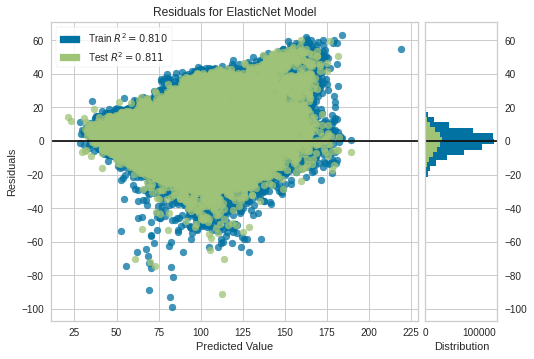

In [ ]:
# Creating the Residuals Plot
visualizer = ResidualsPlot(Elastic,hist=True)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)

# Showing plot
visualizer.show()

From the above plot, it could be observed that the residuals are exhibiting homoescadisticity and the error terms are normally distributed for both the training data and the test data which is good for regression based models.

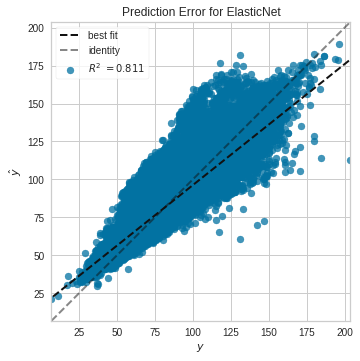

In [ ]:
#Prediction Error Plot
predictor = PredictionError(Elastic)
predictor.fit(X_train, y_train) 
predictor.score(X_test, y_test)

# Showing plot
predictor.show()

From the above plot, the R2 value is 0.81 for the test data which is good for the model built and the best fit line is also closer to the identity line which is a 45 degree line.

###2. Cross- Validation & Hyperparameter Tuning

In [ ]:
#ElasticNet regression with cross validation and hyperparameter tuning

elastic =ElasticNet(tol=0.0001, random_state=42)
parameters = {'alpha': [1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error', cv=5)
elastic_regressor.fit(X_train, y_train)

test_pred = elastic_regressor.predict(X_test)
train_pred = elastic_regressor.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)

Test set evaluation:
_____________________________________
MAE: 5.599514819440776
MSE: 57.66040687058223
RMSE: 7.593444993583757
R2 Square 0.8111035876143528
Adjusted R2 Square 0.8110878851289987
__________________________________
Train set evaluation:
_____________________________________
MAE: 5.604169382597749
MSE: 57.69031110860308
RMSE: 7.5954138207607285
R2 Square 0.8106383104049586
Adjusted R2 Square 0.8106343753596208
__________________________________
The best fit alpha value is found out to be : {'alpha': 1e-08}


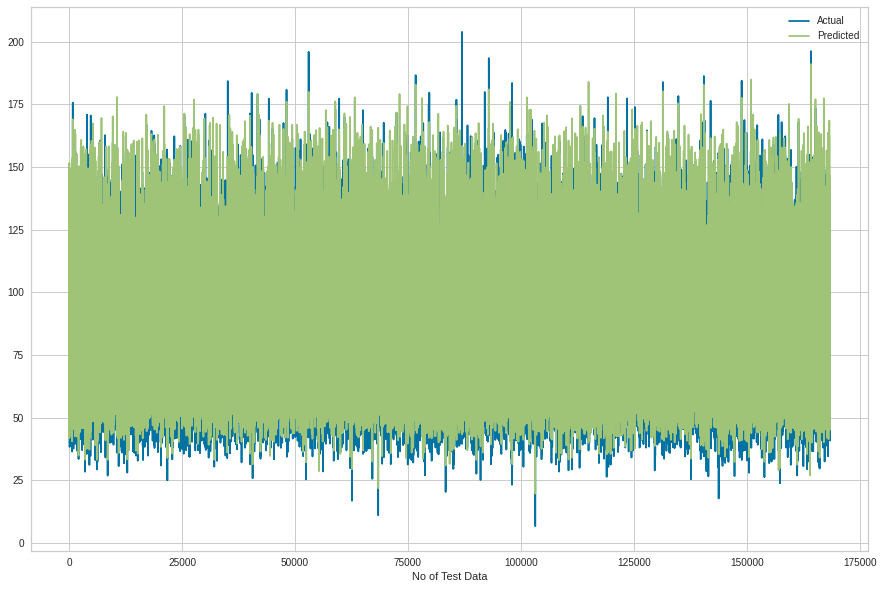

In [ ]:
#Plot the figure
plt.rcParams['agg.path.chunksize'] = 10000
plt.figure(figsize=(15,10))
plt.plot(np.array(y_test))
plt.plot(test_pred)
plt.legend(["Actual","Predicted"])
plt.xlabel('No of Test Data')
plt.show()

From the above plot, it is observed that for the data points, the predicted values are almost matching the actual values thereby creating a good model.

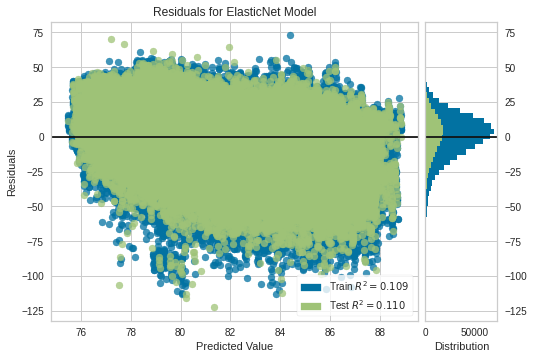

In [ ]:
# Creating the Residuals Plot
visualizer = ResidualsPlot(elastic, hist=True)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)

# Showing plot
visualizer.show()

Although the plot exhibits a train R2 score of 0.109 and test R2 score of 0.11,  the actual R2 scores are  81% for both train and test data. Also the plot is exhibiting homoescadisticity and the error terms or residuals are are normally distributed.

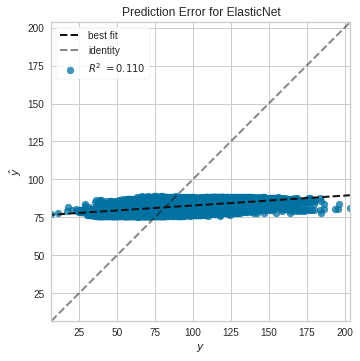

In [ ]:
#Prediction Error Plot
predictor = PredictionError(elastic)
predictor.fit(X_train, y_train) 
predictor.score(X_test, y_test)

# Showing plot
predictor.show()

Here the plot generated isn't showing an actual depiction of the model.

##ML Model - 5 - **Implementing Decision Tree Regressor**


A **decision tree regressor** is a machine learning algorithm that builds a decision tree to model the relationship between a set of input features and a continuous target variable. In contrast to classification trees, which are used for predicting categorical variables, decision tree regressors are used for predicting numerical values.

The decision tree regressor algorithm works by recursively splitting the input space into regions based on the values of the input features that provide the best split for the target variable. The algorithm chooses the feature and split point that minimizes the variance of the target variable in each resulting region. This process continues until the desired stopping criterion is met, such as reaching a maximum depth or minimum number of samples per leaf.

In [ ]:
#Decision Tree Regressor

DT_model = DecisionTreeRegressor()
DT_model.fit(X_train,y_train)
test_pred = DT_model.predict(X_test)
train_pred = DT_model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 2.870046407105809
MSE: 15.260506355510852
RMSE: 3.906469807321036
R2 Square 0.9500063378287559
Adjusted R2 Square 0.9500021819809125
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.07951113249267046
MSE: 0.17040133328819104
RMSE: 0.4127969637584451
R2 Square 0.999440677580678
Adjusted R2 Square 0.9994406659576349
__________________________________


###1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

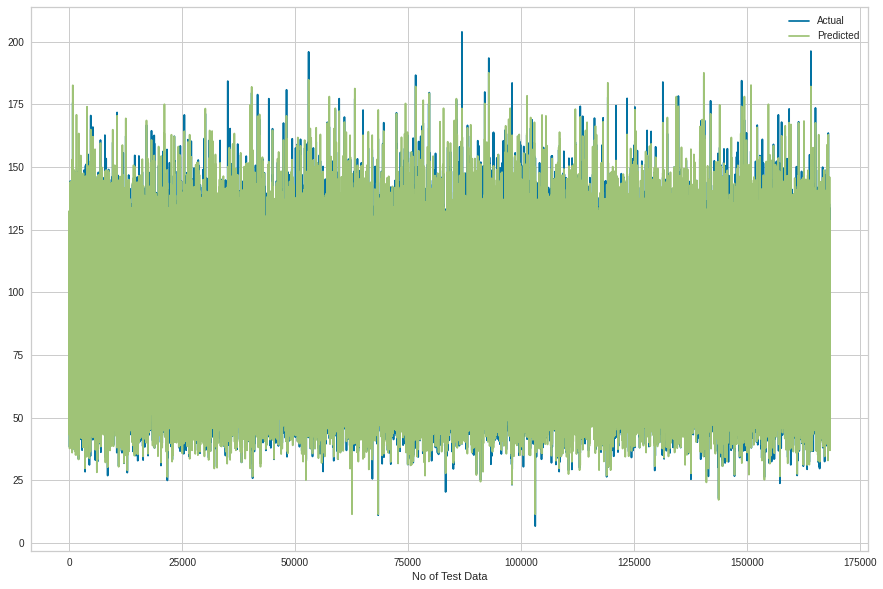

In [ ]:
#Plot the figure
plt.rcParams['agg.path.chunksize'] = 10000
plt.figure(figsize=(15,10))
plt.plot(np.array(y_test))
plt.plot(test_pred)
plt.legend(["Actual","Predicted"])
plt.xlabel('No of Test Data')
plt.show()

From the above plot, it is observed that for the data points, the predicted values are almost matching the actual values thereby creating a good model.

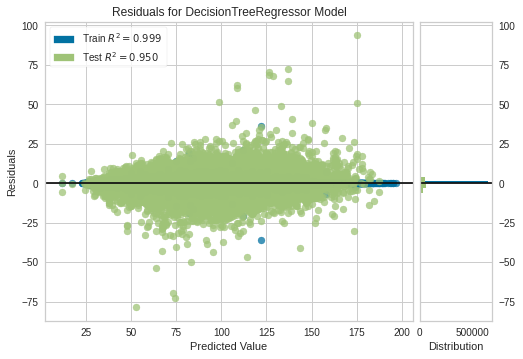

In [ ]:
# Importing ResidualsPlot visualizer

# Creating the Residuals Plot
visualizer = ResidualsPlot(DT_model, hist=True)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)

# Showing plot
visualizer.show()

From the above plot, since the train R2 score is 0.99 which is very close to 1, there are hardly any residuals. Whereas the test R2 score is 0.95 and the residuals are exhibiting homoescadisticity. Also the error terms are non existent for the training data and the error terms are very little but are evenly distributed for the test data.

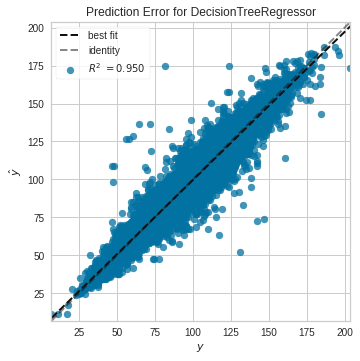

In [ ]:
#Prediction Error Plot
predictor = PredictionError(DT_model)
predictor.fit(X_train, y_train) 
predictor.score(X_test, y_test)

# Showing plot
predictor.show()

From the above plot, the R2 value is 0.95 for the test data which is good for the model built and the best fit line is very close to the identity line which is a 45 degree line. In fact it almost coincides with the identity line.

###Feature Importance For Decision Tree Regressor

In [ ]:
columns = list(X_train.columns)
columns

['Store',
 'DayOfWeek',
 'Customers',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'Promo2',
 'Month_0',
 'Month_1',
 'CompetitionOpenSinceMonth_0',
 'CompetitionOpenSinceMonth_1']

In [ ]:
#getting weights of all the features used in the data
feature_importance = DT_model.feature_importances_
# Lets make a dataframe consists of features and values
feature_importance_df = pd.DataFrame({'Features':columns, 'Values':feature_importance})
feature_importance_df.sort_values(by=["Values"], inplace=True, ascending=False)
feature_importance_df

,Features,Values
2,Customers,0.751022
8,CompetitionDistance,0.061256
6,StoreType,0.059394
0,Store,0.041852
3,Promo,0.039325
7,Assortment,0.011930
13,CompetitionOpenSinceMonth_1,0.011557
9,Promo2,0.007766
11,Month_1,0.006194
12,CompetitionOpenSinceMonth_0,0.003712


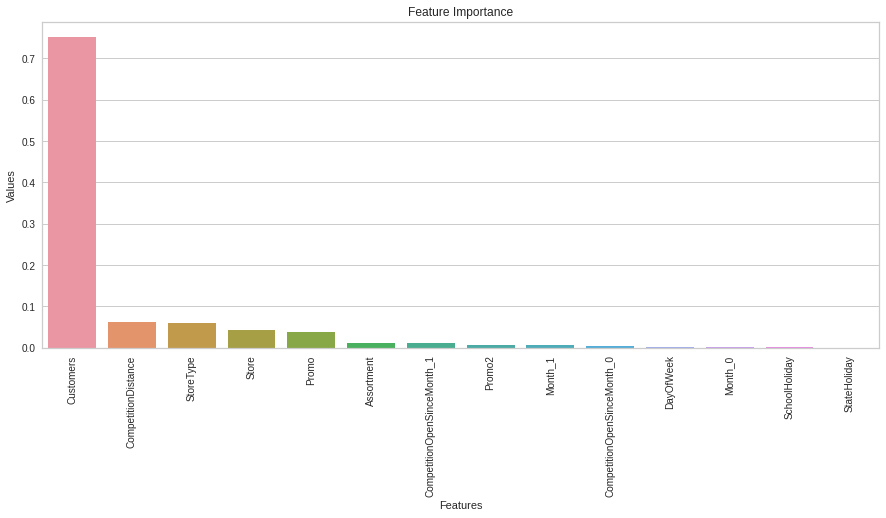

In [ ]:
# Feature Importance
plt.figure(figsize=(15,6))

sns.barplot(x=feature_importance_df['Features'], y=feature_importance_df['Values'],
            data = feature_importance_df ).set(title='Feature Importance')

plt.xticks(rotation=90)
plt.show()

##ML Model - 6 - **Implementing Gradient Boosting Regressor**

**Gradient Boosting Regressor** **(GBR)** is a type of ensemble learning algorithm that combines multiple weak learners (simple models) to create a powerful predictive model for regression problems. The goal of GBR is to build an additive model in a forward stagewise manner by optimizing a differentiable loss function.

In each iteration, GBR fits a decision tree to the residuals (the differences between the predicted and actual values) of the previous iteration. The residuals become the new target variable, and the decision tree is fit to the original input features and the residuals. The output of the decision tree is then added to the predictions of the previous iteration. This process continues until a stopping criterion is met, such as reaching a maximum number of iterations or a minimum improvement in the loss function.

In [ ]:
#Gradient Boosting Regressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()


gb_model.fit(X_train,y_train)

test_pred = gb_model.predict(X_test)
train_pred = gb_model.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)

Test set evaluation:

MAE: 4.721341178522853
MSE: 37.13381385642807
RMSE: 6.093752034373246
R2 Square 0.8783490336545925
Adjusted R2 Square 0.8783389211146388
__________________________________
Train set evaluation:

MAE: 4.721788161141301
MSE: 37.209118550972484
RMSE: 6.099927749651834
R2 Square 0.8778654262430626
Adjusted R2 Square 0.8778628882160411
__________________________________


###1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

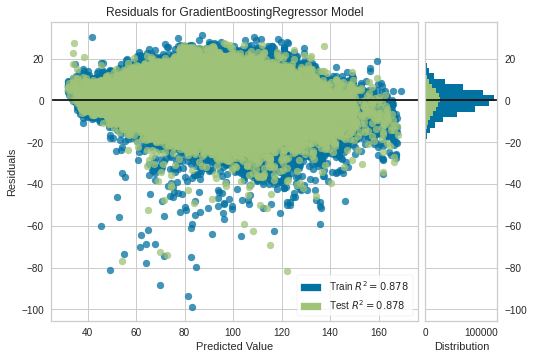

In [ ]:
# Creating the Residuals Plot
visualizer = ResidualsPlot(gb_model, hist=True)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)

# Showing plot
visualizer.show()

From the above plot, it could be observed that the residuals are exhibiting homoescadisticity and the error terms are normally distributed for both the training data and the test data which is good for regression based models.



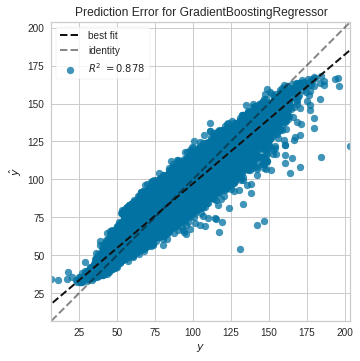

In [ ]:
#Prediction Error Plot
predictor = PredictionError(gb_model)
predictor.fit(X_train, y_train) 
predictor.score(X_test, y_test)

# Showing plot
predictor.show()

From the above plot, the R2 value is 0.87 for the test data which is good for the model built and the best fit line is also closer to the identity line which is a 45 degree line.

#####General observations of models built.

In [ ]:
#R2 scores of models
LR=round(lin_reg.score(X_test,y_test)*100,2)
las=round(metrics.r2_score(y_test,lasso_regressor.predict(X_test))*100,2)
Rg=round(metrics.r2_score(y_test,ridge_regressor.predict(X_test))*100,2)
Elas=round(Elastic.score(X_test,y_test)*100,2)
Dt=round(DT_model.score(X_test,y_test)*100,2)
gb=round(gb_model.score(X_test,y_test)*100,2)



In [ ]:
#RMSE values of models
las1=round(np.sqrt(metrics.mean_squared_error(y_test,lasso.predict(X_test))),2)
LR1=round(np.sqrt(metrics.mean_squared_error(y_test,lin_reg.predict(X_test))),2)
Rg1=round(np.sqrt(metrics.mean_squared_error(y_test,ridge.predict(X_test))),2)
Elas1=round(np.sqrt(metrics.mean_squared_error(y_test,Elastic.predict(X_test))),2)
Dt1=round(np.sqrt(metrics.mean_squared_error(y_test,DT_model.predict(X_test))),2)
gb1=round(np.sqrt(metrics.mean_squared_error(y_test,gb_model.predict(X_test))),2)



In [ ]:
#Creating a dataframe
models =pd.DataFrame({
    'Model': ['Linear_Regression', 'Lasso_Regression','Ridge_Regression',
              'Elastic_Net', 'Desicion-Tree_Regression', 'Gradient_Boosting_Regression'],
     'RMSE'  :[LR1,las1,Rg1,Elas1,Dt1,gb1],     
    'R2 Score': [LR,las,Rg,Elas,Dt,gb]})


In [ ]:
#models comparison table
models

,Model,RMSE,R2 Score
0,Linear_Regression,7.59,81.11
1,Lasso_Regression,7.59,81.11
2,Ridge_Regression,7.59,81.11
3,Elastic_Net,7.60,81.08
4,Desicion-Tree_Regression,3.91,95.00
5,Gradient_Boosting_Regression,6.09,87.83


In [ ]:
true_and_preds=pd.DataFrame(zip(y_test,test_pred),columns=['Actual','Predicted'])

In [ ]:
#snipet of predictions and actual values of sales
true_and_preds.head(5)

,Actual,Predicted
0,98.640762,101.607604
1,90.945038,85.643581
2,81.018516,80.732123
3,82.577237,85.475932
4,79.824808,86.987577


Except Decision Tree Regressor and Gradient Boosting Regressor, all the other models had the same R2 score for both the training and the test data.

Hyperparameter Tuning and Cross Validation didn't improve the model performance in the case of Linear Regression, Lasso Regression, Ridge Regression and ElasticNet Regression.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

From the above models built, the Decision Tree Regressor has the best R2 value of 99% for training data and 95% for the test data. It also has the best adjusted R2 value of 99% for training data and 94% for the test data.

The R2 score or value is a better metric compared to MAE, MSE and RMSE as it measures the goodness of fit of the model. So higher the R2 score, better will be the model in predicting the values.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

####SHAP: Shapley Additive Explanations

SHAP (Shapley Additive exPlanations) is the extension of the Shapley value, a game theory concept introduced in 1953 by mathematician and economist Lloyd Shapley. SHAP is an improvement of the method for machine learning model explainability study. It is used to calculate the impact of each part of the model on the final result. The concept is a mathematical solution for a game theory problem – how to share a reward among team members in a cooperative game?

Shapley's value assumes that we can compute the value of the surplus with or without each analyzed factor. The algorithm estimates the value of each factor by assessing the values of its ‘coalitions’. In the case of Machine Learning, the ‘surplus’ is a result of our algorithm and co-operators are different input values. The goal of SHAP is to explain the prediction by computing the contribution of each feature to the final result.

The prediction starts from the baseline. The baseline for Shapley values is the average of all predictions. Each feature value is a force that either increases or decreases the prediction. Each feature contributing to pushing the model output from the base value to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue.

####SHAP Implementation

In [ ]:
sns.set_style('darkgrid') 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.0025, random_state=0)
print(X_train.shape)
print(X_test.shape)

(840046, 14)
(2106, 14)


In [ ]:
# Prepares a default instance of the decison tree regressor
model = DecisionTreeRegressor(max_depth=8)
# Fits the model on the data
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [ ]:
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)

We are just taking the test size to be small because, it has very large data so , it takes a lot of time.

In [ ]:
shap_values = explainer(X_test)

Permutation explainer: 2107it [01:43, 18.94it/s]


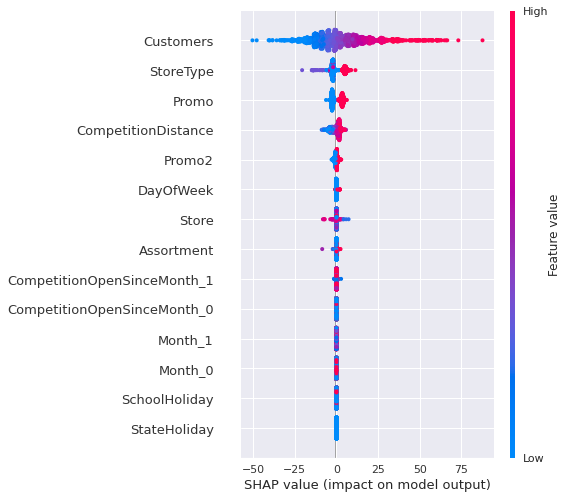

In [ ]:
#summary plot
shap.summary_plot(shap_values)

The summary plot indicates the effect of the SHAP value for each feature on the model output. The Customers feature had the greatest impact followed by StoreType, Promo etc. The positive SHAP values of Customers had a greater impact on the model output than the negative SHAP values. The other features could be interpreted in a similar fashion.

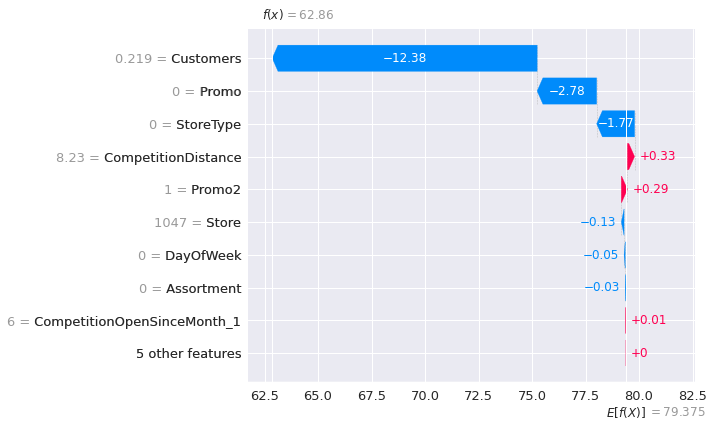

In [ ]:
#waterfall plot
shap.plots.waterfall(shap_values[0], max_display=10)

The above plot shows the features that contributes to the decrease in the predicted output value from the average output value. There is a decrease of about 17-18 units. Of this decrease the most is by the Customers feature followed by Promo, StoreType etc. The red lines indicate an increase and the blue lines indicate a decrease.

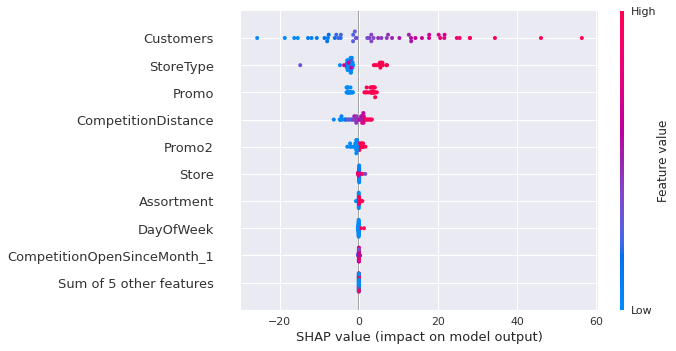

In [ ]:
# Plots the beeswarm plot
shap.plots.beeswarm(shap_values.sample(50))

The beeswarm plot indicates the effect of the SHAP value for each feature on the model output. The Customers feature had the greatest impact followed by StoreType, Promo etc. The positive SHAP values of Customers had a greater impact on the model output than the negative SHAP values. The other features could be interpreted in a similar fashion.

We are able to see the importance of the features and how it is affecting the dependent variable through various plots using SHAP library.

Even though the Customer feature is the most important, The task is not only to predict the number of customers, so fitting a model based on the other important variables is also necessary in the dataset like
'CompetitionDistance','Promo','StoreType','DayOfWeek' and 'Assortment' where the dependent variable depends on these features and its impact of model output.

##**Conclusion**

From EDA:

1. Sales is highly correlated to customers.

2. The average sales were more when promotions were offered although average sales were lower when continued promotions were offered.

3. Maximum instances of sales were on Saturday and minimum on a Sunday although the average sales were the highest on Sunday and least on Saturday.

4. Maximum instances of sales when store was type 'a' and minimum when store was type 'b' although the average sales were maximum for store type 'b' and least for store type 'd'. This clearly shows store type 'b' is the best performing.

5. Maximum instances of sales when assortment was type 'a'(basic) and least when type 'b'(extra) although average sales were maximum for assortment type 'b' and least for assortment type 'a'. This clearly shows assortment type 'b' is better performing.

6. Also only Store type 'b' had this extra assortment. To increase average sales in other store types, the extra assortment could be introduced.

7. When it came to competition open since year, Store type 'b' had the best performance. But as competition distance increased, suprisingly store type 'b' performed relatively worser. This could be due to lack of product diffrentiation and competitor pressure.

8. Despite offering no promotions,lesser instances of sales and customers on Christmas, suprisingly the average sales was good on Christmas.

Recommendations:
1. Since store type 'b' performed better on many aspects, the company could increase its number and do a cost benefit analysis for the other store types.

2. Assortment type 'b'(extra) could be introduced to other store types as well

3. It is a good thing that stores didn't offer promotions on weekends and had higher average sales. But offering promotions at all times to increase average sales won't be profitable for the store in the long run.

4. Since more instances of sales were made on Saturday but lesser average sales, inorder to make sales consistent across all days of the week, the store could devise speccial offers/promotions valid only on Saturdays.

5. The goal of any store is to make sure that the average sales remain consistent instead of showing drastic changes. Managers could study and target specific strategies to ensure this.

ML Models:

1. Except for Decision Tree Regressor and Gradient Boosting Regressor, all the other ML models had a very similar performance in terms of the evaluation metrics.

2. Fortunately the training and test R2 scores for almost all the models was the same whichis very good as there was no bias-variance tradeoff. There was no underfitting no overfitting to the the training data.

3. There was no observable improvement in model performance after using cross validation and hyperparameter tuning.

4. Decision Tree Regressor was the best performer among the models used with an R2 score of 95% on the test set and 99% on the training set.
This could be due to the models' ability to model non-linear relationships between the target variable and independent variables or the models' ability to model feature interactions.This can be useful in cases where the effect of one feature on the target variable may depend on the value of another feature.

5. Under SHAP(explaning the performance of the ML models using the features involved), Customers had the greatest impact on the Sales of the stores, followed by Store type and Promotions offered.

6. Even though the Customer feature is the most important, The task is not only to predict the number of customers, so fitting a model based on the other important variables is also necessary in the dataset like
'CompetitionDistance','Promo','StoreType','DayOfWeek' and 'Assortment' where the dependent variable depends on these features and its impact of model output.

### ***Hurrah! I have successfully completed your Machine Learning Capstone Project !!!***